## Tasca M8 T01
Descripció
Exercicis d'algoritmes d'Agrupació.

- Exercici 1: Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.

    Important: Tingues en compte que prèviament et caldrà preparar el dataset.


- Exercici 2: Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.


- Exercici 3: Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.



Objectius: Neteja i interpretació de les dades. Preprocessats i PCA. Trobar nombre de clústers òptim, Creació de models unsupervised (k-means i clustering jeràrquic). Interpretar els resultats.

Lliurament: Enviar l'URL a un repositori anomenat ML_unsupervised que contingui la solució. S'ha d'entregar cada exercici en un mateix fitxer i en un repositori.


### Analisi previ de la base de dades


In [1]:
#!pip install kneed   # per ultilitzar el metode elbow més endavant

In [2]:
import pandas as pd

df = pd.read_csv(r'C:\Users\WotanJr\Desktop\Data Science - IT Academy\Sprint 8\Publicacions Facebook Thailandia.csv')
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


Comencem important les dades i visualitzant-les. Veiem que hi han 4 columnes buides i una altra (status_id) que sembla estar codificada, per la qual cosa no sembla que podem treure gaire informació d'ella. També la traurem. Hi ha una columna que marca una data, però no té format com a tal.

In [3]:
df = df.drop(['Column1', 'Column2', 'Column3', 'Column4', 'status_id'], axis=1)
df

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7045,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0
7046,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0
7047,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0
7048,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0


In [4]:
df.nunique()

status_type            4
status_published    6913
num_reactions       1067
num_comments         993
num_shares           501
num_likes           1044
num_loves            229
num_wows              65
num_hahas             42
num_sads              24
num_angrys            14
dtype: int64

In [5]:
df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [6]:
df.isna().sum()

status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64

In [7]:
df.isnull().sum()

status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64

Hem trobat una columna categorica (status_type) que conté l'element de la publicació (video, foto, link, estatus). Hem vist que no hi han NA's ni null's i procedim a buscar i eliminar els duplicats.

In [8]:
df[df.duplicated()].count()

status_type         54
status_published    54
num_reactions       54
num_comments        54
num_shares          54
num_likes           54
num_loves           54
num_wows            54
num_hahas           54
num_sads            54
num_angrys          54
dtype: int64

In [9]:
df[df.duplicated()].head()

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
3739,photo,7/17/2017 7:11,0,0,0,0,0,0,0,0,0
3763,photo,7/10/2017 8:41,0,0,0,0,0,0,0,0,0
4048,video,5/27/2018 1:16,0,0,0,0,0,0,0,0,0
6221,video,6/10/2018 3:43,376,20,3,354,19,3,0,0,0
6222,photo,6/9/2018 22:53,255,7,4,249,6,0,0,0,0


In [10]:
df[df.duplicated()].tail()

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
6267,photo,3/22/2018 3:48,879,165,18,867,4,8,0,0,0
6268,photo,3/21/2018 1:15,114,6,1,108,3,3,0,0,0
6269,photo,3/20/2018 1:54,186,15,1,172,3,11,0,0,0
6270,photo,3/18/2018 4:28,1985,39,21,1961,11,12,0,1,0
6271,photo,3/16/2018 1:57,985,71,42,962,5,16,2,0,0


In [11]:
df.shape

(7050, 11)

In [12]:
df = df.drop_duplicates()

In [13]:
df.shape

(6996, 11)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6996 entries, 0 to 7049
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_type       6996 non-null   object
 1   status_published  6996 non-null   object
 2   num_reactions     6996 non-null   int64 
 3   num_comments      6996 non-null   int64 
 4   num_shares        6996 non-null   int64 
 5   num_likes         6996 non-null   int64 
 6   num_loves         6996 non-null   int64 
 7   num_wows          6996 non-null   int64 
 8   num_hahas         6996 non-null   int64 
 9   num_sads          6996 non-null   int64 
 10  num_angrys        6996 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 655.9+ KB


In [15]:
df.dtypes

status_type         object
status_published    object
num_reactions        int64
num_comments         int64
num_shares           int64
num_likes            int64
num_loves            int64
num_wows             int64
num_hahas            int64
num_sads             int64
num_angrys           int64
dtype: object

Crearem timestamps per poder fer una serie temporal i veure l'evolució en el temps de les dades. També crearem dues columnes noves que contindran el dia de la setmana i la part del dia (matí, tarda...) en que es produeix la publicació, per veure si hi ha alguna periodicitat.

In [16]:

#Timestamps:
df['time_st'] = pd.to_datetime(df['status_published'])

df['weekday'] = df['time_st'].apply(lambda x: x.day_name())

def dp(h):
    if h in [6, 7, 8, 9, 10, 11]:
        return('morning')
    elif h in [12, 13, 14, 15]:
        return('noon')
    elif h in [16, 17, 18]:
        return('afternoon')
    elif h in [19, 20, 21]:
        return('evening')
    else:
        return('night')

df['day_part'] = df['time_st'].dt.hour.apply(dp)

df.T

C:\Users\WotanJr\AppData\Local\Temp\ipykernel_18832\4265591083.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_st'] = pd.to_datetime(df['status_published'])
C:\Users\WotanJr\AppData\Local\Temp\ipykernel_18832\4265591083.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weekday'] = df['time_st'].apply(lambda x: x.day_name())
C:\Users\WotanJr\AppData\Local\Temp\ipykernel_18832\4265591083.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

,0,1,2,3,4,5,6,7,8,9,...,7040,7041,7042,7043,7044,7045,7046,7047,7048,7049
status_type,video,photo,video,photo,photo,photo,video,video,photo,photo,...,photo,photo,photo,photo,photo,photo,photo,photo,photo,photo
status_published,4/22/2018 6:00,4/21/2018 22:45,4/21/2018 6:17,4/21/2018 2:29,4/18/2018 3:22,4/18/2018 2:14,4/18/2018 0:24,4/17/2018 7:42,4/17/2018 3:33,4/11/2018 4:53,...,9/25/2016 13:29,9/24/2016 8:15,9/24/2016 6:07,9/24/2016 5:07,9/24/2016 4:37,9/24/2016 2:58,9/23/2016 11:19,9/21/2016 23:03,9/20/2016 0:43,9/10/2016 10:30
num_reactions,529,150,227,111,213,217,503,295,203,170,...,93,9,4,196,86,89,16,2,351,17
num_comments,512,0,236,0,0,6,614,453,1,9,...,26,0,0,2,0,0,0,0,12,0
num_shares,262,0,57,0,0,0,72,53,0,1,...,34,0,0,3,0,0,0,0,22,0
num_likes,432,150,204,111,204,211,418,260,198,167,...,90,7,4,195,86,89,14,1,349,17
num_loves,92,0,21,0,9,5,70,32,5,3,...,3,2,0,1,0,0,1,1,2,0
num_wows,3,0,1,0,0,1,10,1,0,0,...,0,0,0,0,0,0,0,0,0,0
num_hahas,1,0,1,0,0,0,2,1,0,0,...,0,0,0,0,0,0,1,0,0,0
num_sads,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
df['weekday'].unique()

array(['Sunday', 'Saturday', 'Wednesday', 'Tuesday', 'Monday', 'Thursday',
       'Friday'], dtype=object)

In [18]:
df['day_part'].unique()

array(['morning', 'night', 'noon', 'evening', 'afternoon'], dtype=object)

In [19]:
df.dtypes

status_type                 object
status_published            object
num_reactions                int64
num_comments                 int64
num_shares                   int64
num_likes                    int64
num_loves                    int64
num_wows                     int64
num_hahas                    int64
num_sads                     int64
num_angrys                   int64
time_st             datetime64[ns]
weekday                     object
day_part                    object
dtype: object

In [20]:
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
status_type,6996,4,photo,4242,NaN,NaN,NaN,NaN,NaN,NaN,NaN
status_published,6996,6913,12/25/2017 7:50,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_reactions,6996.0,NaN,NaN,NaN,225.091052,0.0,17.0,58.0,216.0,4710.0,452.953875
num_comments,6996.0,NaN,NaN,NaN,225.648799,0.0,0.0,4.0,22.25,20990.0,892.922206
num_shares,6996.0,NaN,NaN,NaN,40.275872,0.0,0.0,0.0,4.0,3424.0,132.072584
num_likes,6996.0,NaN,NaN,NaN,210.036735,0.0,17.0,57.0,182.0,4710.0,439.623067
num_loves,6996.0,NaN,NaN,NaN,12.757004,0.0,0.0,0.0,3.0,657.0,40.114602
num_wows,6996.0,NaN,NaN,NaN,1.253431,0.0,0.0,0.0,0.0,278.0,8.727383
num_hahas,6996.0,NaN,NaN,NaN,0.698256,0.0,0.0,0.0,0.0,157.0,3.971738
num_sads,6996.0,NaN,NaN,NaN,0.232704,0.0,0.0,0.0,0.0,51.0,1.481415


Podem veure pels timestamps mínim i màxim com les dades van desde juliol de 2012 fins a jumy de 2018. Veiem una disparitat molt marcada en les mitjanes i els màxims dels valors numerics, indicatiu d'una disparitat forta de la relevancia d'unes i altres publicacions (el nombre de comentaris mitjà és 225 i el màxim 20990).

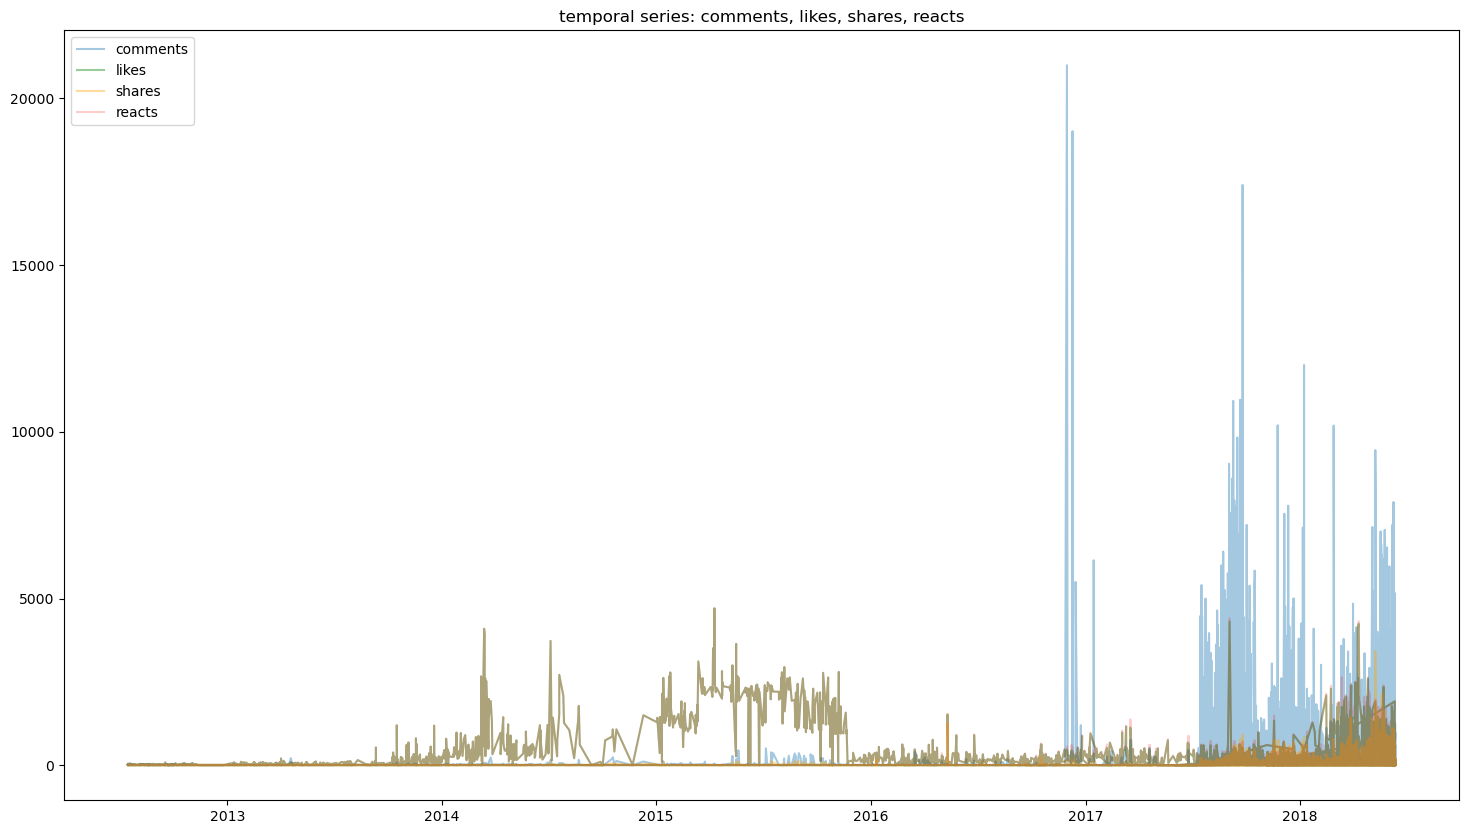

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18,10))

plt.plot(df.time_st, df.num_comments, label="comments", alpha=0.4)
plt.plot(df.time_st, df.num_likes, label="likes", color='g', alpha=0.4)
plt.plot(df.time_st, df.num_shares, label="shares", color='orange', alpha=0.4)
plt.plot(df.time_st, df.num_reactions, label="reacts", color='r', alpha=0.2)

plt.title("temporal series: comments, likes, shares, reacts")
plt.legend(loc="upper left")
plt.show()

El primer que podem observar és que el nombre de reacts és més alt durant els primers anys, especialment entre 2014 i 2016. Però  també es pot observar un pic molt gran de comentaris a finals de 2017, i de fet, a partir d'allà van començar a ser predominants. En el següent heatmap observarem si hi han relacions lineals entre les variable numeriques, i de fet hi ha una molt marcada entre nombre de likes i de reaccions.

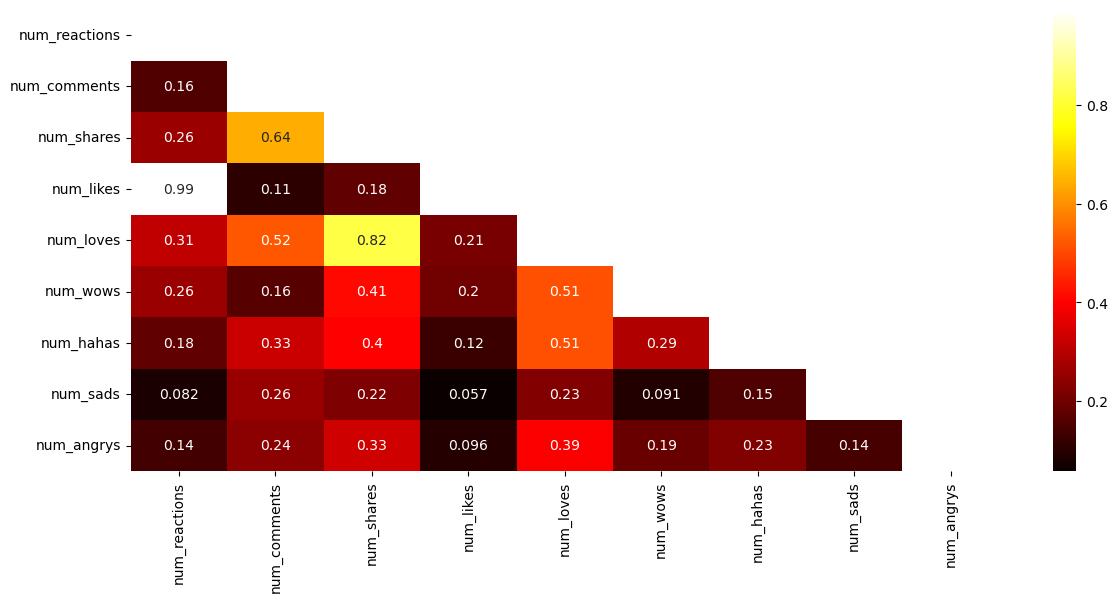

In [22]:
import numpy as np
import seaborn as sns

plt.figure(figsize=(14,6))
mask = np.triu(np.ones_like(df._get_numeric_data().corr()))  # filter the double output and the main diagonal, also filter non numeric columns
sns.heatmap(df._get_numeric_data().corr(), mask = mask, annot=True, cmap='hot')
plt.show()

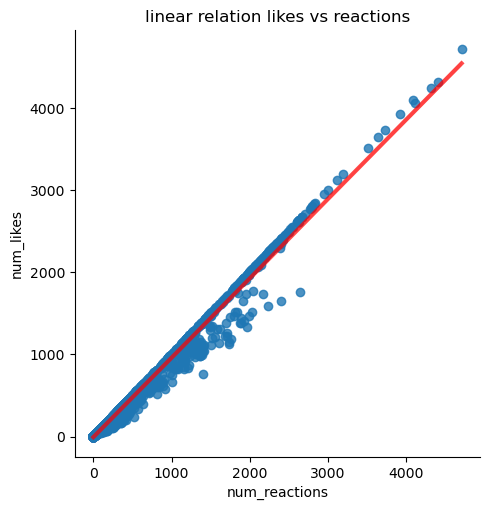

In [23]:
sns.lmplot(x="num_reactions", y="num_likes", data=df, line_kws={"color": "red","alpha":0.7,"lw":3})   # 0.99

plt.title("linear relation likes vs reactions")
plt.show()

Aquesta relació tan lineal podria ser pel fet de que el numero de reaccions és la suma del de likes i de la resta de reaccions: loves, wows, hahas, sads i angrys. Veiem que hi ha una mica de desviació, que pot ser deguda a la inserció de la resta de reaccions, que no sempre van ser-hi presents, però mentre no hi eren reaccions eren iguals a likes.

Més a grosso modo mirarem amb un pie chart la proporció i nombre de estatus.

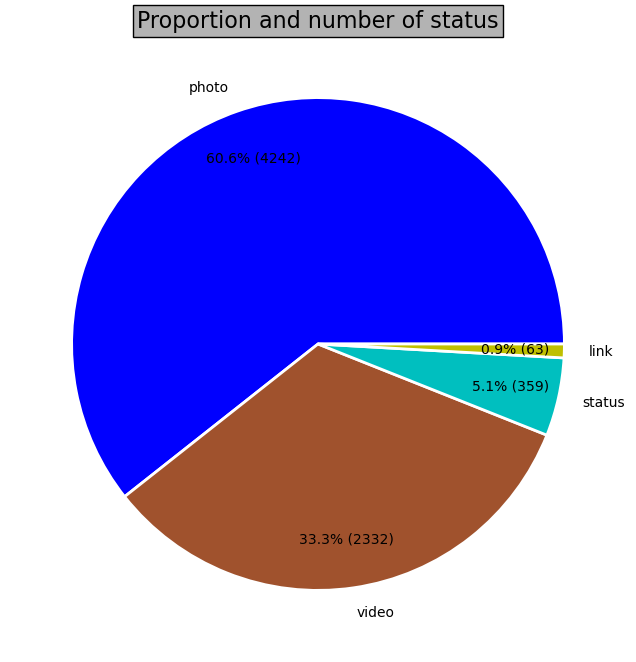

In [24]:
plt.figure(figsize=(8,8))

mycolors = ["b", "Sienna", "c", "y"]

plt.pie((df['status_type'].value_counts()), labels = df['status_type'].value_counts().index,
        startangle = 0, counterclock=True, colors = mycolors,
        autopct=lambda p: '{:.1f}% ({:.0f})'.format(p,(p/100)*(df['status_type'].value_counts()).sum()),
        pctdistance = 0.8, wedgeprops = {"linewidth": 2, "edgecolor": "white"})

# plt.legend(title = "Districtes", bbox_to_anchor =(1, 0, 0.5, 1))  # No posem llegenda pq ja hem posat labels
plt.title('Proportion and number of status', fontsize=16, bbox={'facecolor':'0.7', 'pad':3})

plt.show()

Les fotos són molt predominants seguides dels videos. Els status són una part petita i els links són una part residual del total.

Ara farem un cop d'ull a les variables categoriques. Agruparem les grafiques en reactions, comments i shares per una banda i likes, loves, wows, hahas, sads i angrys (que anomenarem reacts) per una altra. Això ho fem per poder veure els reacts amb més detall ja que quasi no es veuen si els posem en la mateixa grafica amb els altres.

In [25]:
reacts = df.drop('time_st', axis=1).groupby('status_type').sum()[['num_reactions', 'num_comments', 'num_shares']]
reacts

,num_reactions,num_comments,num_shares
status_type,,,
link,23319,359,277
photo,731372,65678,10574
status,158944,13078,925
video,661102,1499524,269994


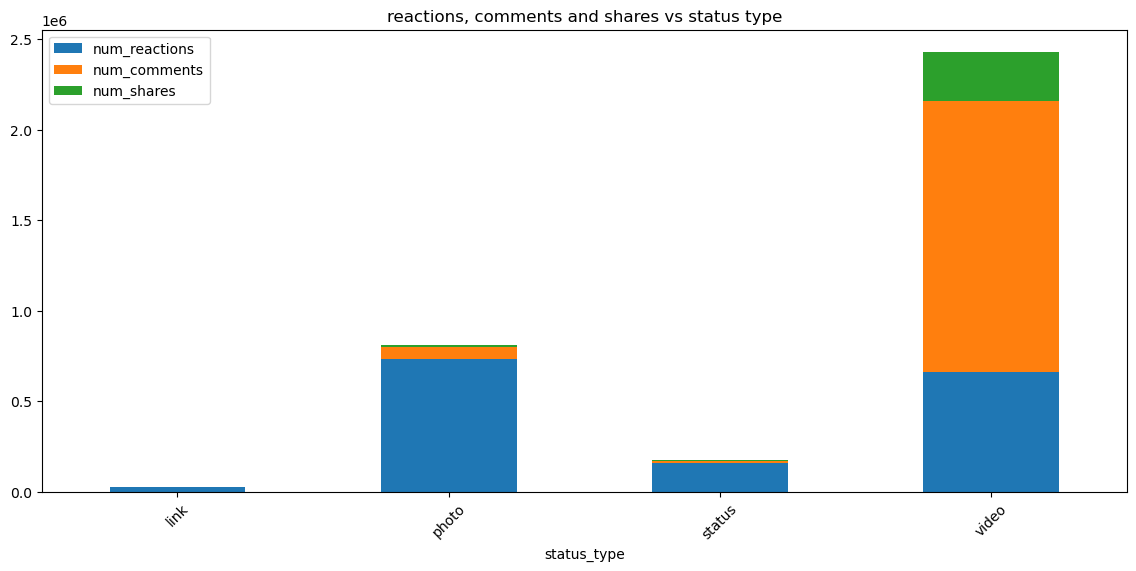

In [26]:
reacts.plot(kind='bar', stacked=True, figsize=(14,6))
plt.xticks(rotation = 45)
plt.title("reactions, comments and shares vs status type")
plt.show()

Les fotos els links i els status van acompanyats majoritariament de reaccions, mentre que en els videos la cosa està més repartida tot i que predominen els comentaris.

In [27]:
reacts2 = df.drop('time_st', axis=1).groupby('status_type').sum()[['num_likes','num_loves','num_wows','num_hahas','num_sads','num_angrys']]
reacts2

,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
status_type,,,,,,
link,23286,19,12,2,0,0
photo,721490,5748,2623,793,536,169
status,157797,549,423,40,126,9
video,566844,82932,5711,4050,966,593


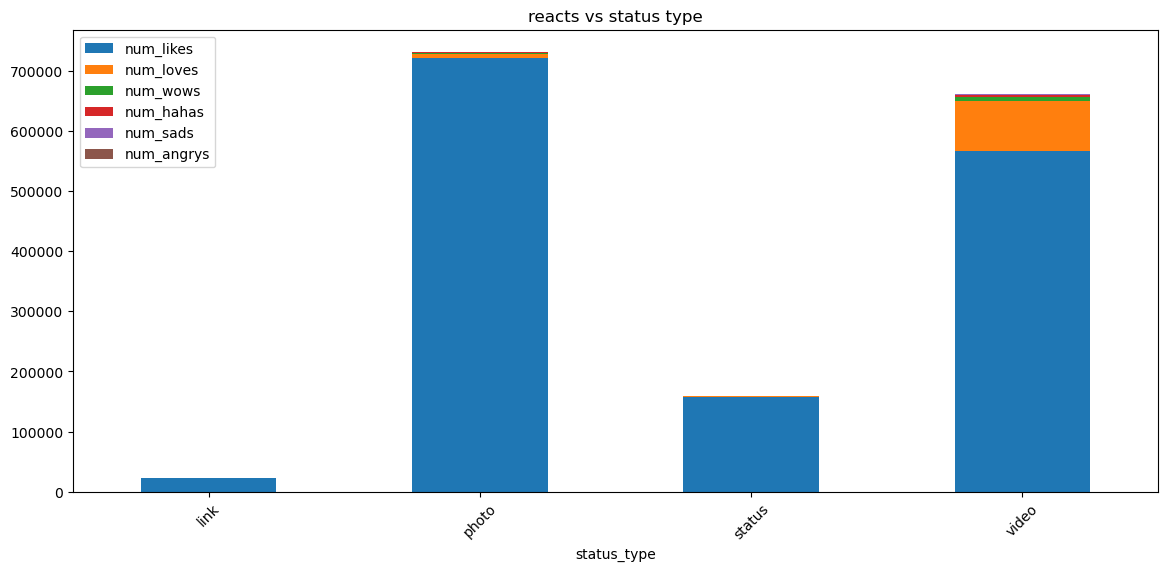

In [28]:
reacts2.plot(kind='bar', stacked=True, figsize=(14,6))
plt.xticks(rotation = 45)
plt.title("reacts vs status type")
plt.show()

Es pot apreciar també com la practica totalitat dels reacts són likes, excepte en el videos, on encara podem trobar bastants loves.

In [29]:
reacts_perday = df.drop('time_st', axis=1).groupby('weekday').sum()[['num_reactions', 'num_comments', 'num_shares']].reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
reacts_perday

,num_reactions,num_comments,num_shares
weekday,,,
Monday,199539,228543,35201
Tuesday,205070,237954,40074
Wednesday,231784,229595,40852
Thursday,240409,234039,43650
Friday,229918,206654,38237
Saturday,225019,252172,41842
Sunday,242998,189682,41914


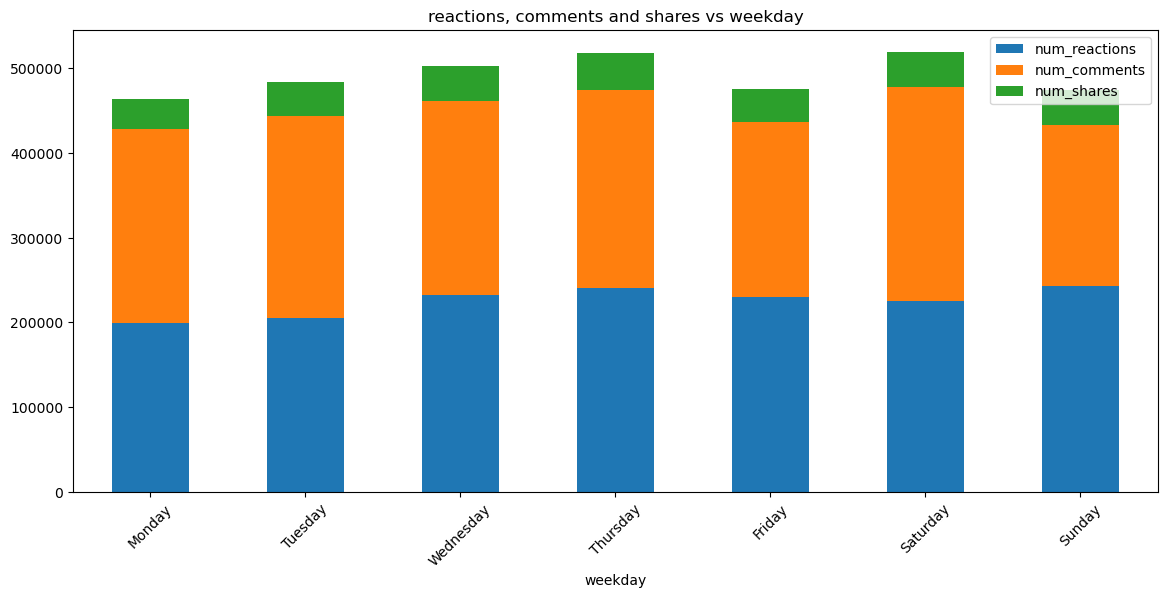

In [30]:
reacts_perday.plot(kind='bar', stacked=True, figsize=(14,6))
plt.xticks(rotation = 45)
plt.title("reactions, comments and shares vs weekday")
plt.show()

In [31]:
reacts_perday2 = df.drop('time_st', axis=1).groupby('weekday').sum()[['num_likes','num_loves','num_wows','num_hahas','num_sads','num_angrys']].reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
reacts_perday2

,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
weekday,,,,,,
Monday,185070,12305,1029,753,258,121
Tuesday,189698,13155,1119,823,160,111
Wednesday,216869,12064,1746,756,247,102
Thursday,224985,12867,1499,693,278,84
Friday,215215,12644,1127,585,232,115
Saturday,209764,13155,984,750,240,123
Sunday,227816,13058,1265,525,213,115


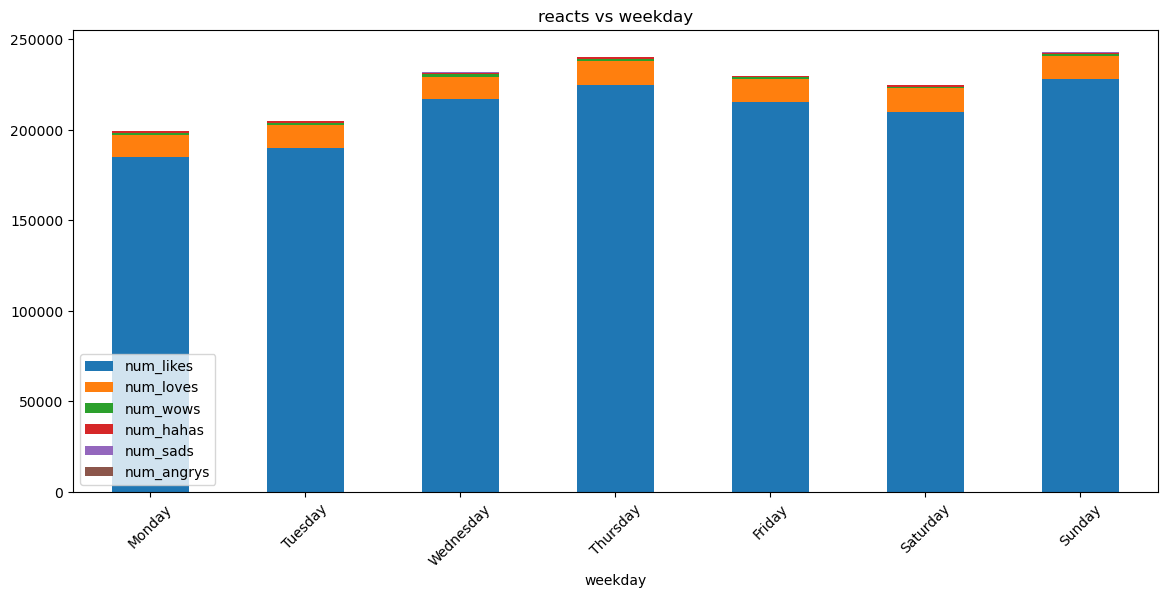

In [32]:
reacts_perday2.plot(kind='bar', stacked=True, figsize=(14,6))
plt.xticks(rotation = 45)
plt.title("reacts vs weekday")
plt.show()

In [33]:
reacts_perdaypart = df.drop('time_st', axis=1).groupby('day_part').sum()[['num_reactions', 'num_comments', 'num_shares']].reindex(['morning', 'noon', 'afternoon', 'evening', 'night'])
reacts_perdaypart

,num_reactions,num_comments,num_shares
day_part,,,
morning,587126,956237,171667
noon,34366,23690,3059
afternoon,3568,101,27
evening,68796,39133,2513
night,880881,559478,104504


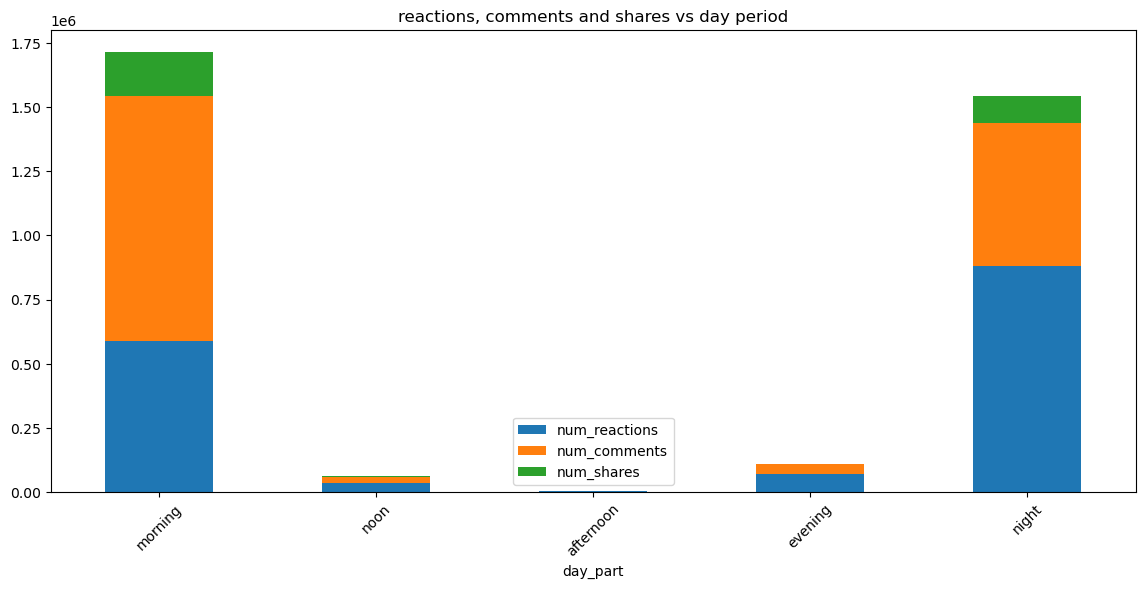

In [34]:
reacts_perdaypart.plot(kind='bar', stacked=True, figsize=(14,6))
plt.xticks(rotation = 45)
plt.title("reactions, comments and shares vs day period")
plt.show()

In [35]:
reacts_perdaypart2 = df.drop('time_st', axis=1).groupby('day_part').sum()[['num_likes','num_loves','num_wows','num_hahas','num_sads','num_angrys']].reindex(['morning', 'noon', 'afternoon', 'evening', 'night'])
reacts_perdaypart

,num_reactions,num_comments,num_shares
day_part,,,
morning,587126,956237,171667
noon,34366,23690,3059
afternoon,3568,101,27
evening,68796,39133,2513
night,880881,559478,104504


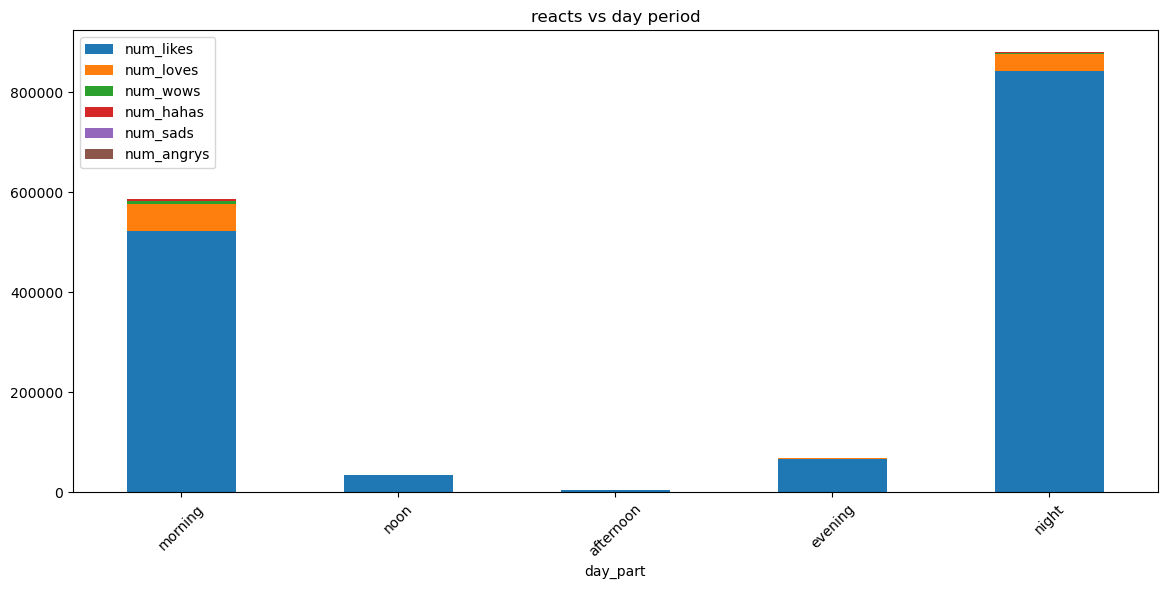

In [36]:
reacts_perdaypart2.plot(kind='bar', stacked=True, figsize=(14,6))
plt.xticks(rotation = 45)
plt.title("reacts vs day period")
plt.show()

In [37]:
result = df.groupby(['weekday','day_part'])['weekday'].count()

result

weekday    day_part 
Friday     afternoon      2
           evening       39
           morning      421
           night        516
           noon          24
Monday     afternoon      1
           evening       29
           morning      391
           night        540
           noon          24
Saturday   afternoon      2
           evening       30
           morning      397
           night        528
           noon          19
Sunday     afternoon      1
           evening       24
           morning      371
           night        626
           noon          27
Thursday   afternoon      3
           evening       39
           morning      385
           night        519
           noon          26
Tuesday    afternoon      2
           evening       34
           morning      403
           night        578
           noon          22
Wednesday  evening       33
           morning      389
           night        524
           noon          27
Name: weekday, dtype: int64

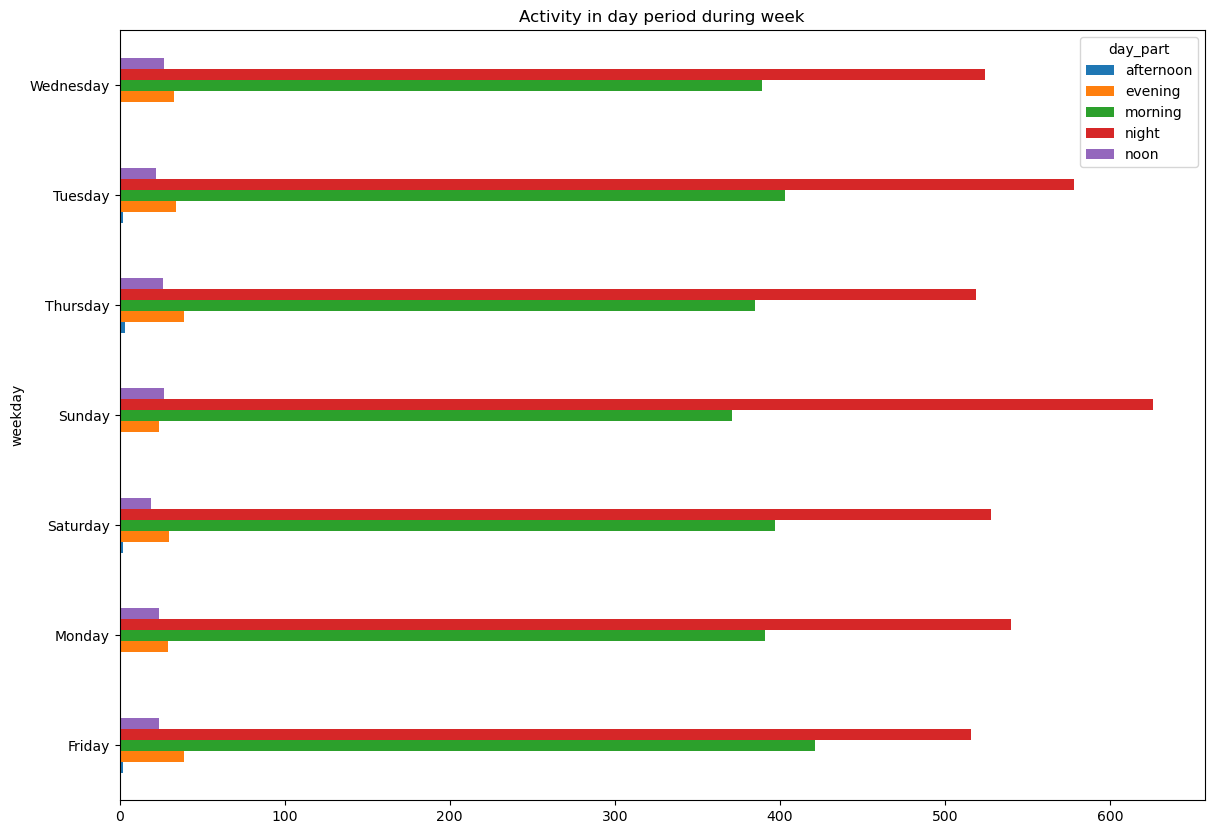

In [38]:
result.unstack().plot(kind = 'barh', figsize=(14,10))
plt.title("Activity in day period during week")
plt.show()

No hi ha cap patró setmanal, els numeros són bastant constants durant tots els dies. Hi ha una cosa que resulta curiosa, i es que la gran majoria de reaccions comentaris i shares es produeixen durant les hores de matí i nit, que són les hores entre les 22 hores i les 11 hores del matí. Això fa pensar que a no ser que a Tailandia utilitzin facebook de nit, els registres s'han fet en algun lloc amb una franja horària diferent.

### Variables gausianes i outliers:

Amb el següent codi el que farem és analitzar les variables numeriques. Utilitzem el test de Shapiro per veure si hi ha alguna variable que sigui gaussiana. També s'analitza si les variables tenen o no outliers. D'aquí extreiem quatre llistes (variable gausianes, no gausianes, amb outliers i sense). Després mostrem els boxplots per comprovar-ho visualment. Amb la informació extreta podrem fer el preprocessat.

In [39]:
from scipy.stats import shapiro
gaussians_list = []
non_gaussians_list = []

for i, (name, dtype) in enumerate(zip(df.columns, df.dtypes)):
    if dtype == 'int64' or dtype == 'float64':
        stat, p = shapiro(df[name])
        #print('stat=%.3f, p=%.3f' % (stat, p))
        if p > 0.05:
            #print('{} is probably Gaussian'.format(name))
            gaussians_list.append(name)
        else:
            #print('{} is probably not Gaussian'.format(name))
            non_gaussians_list.append(name)

print('\nLes següents variables són probablement gausianes: ', gaussians_list)
print('\nLes següents variables són probablement no gausianes: ', non_gaussians_list)

with_outliers = []
no_outliers = []

for k,v in df._get_numeric_data().drop(gaussians_list, axis=1).items():
    Q1 = df[k].quantile(0.25)
    Q3 = df[k].quantile(0.75)
    IQR = Q3 - Q1    # a la documentació de sns boxplot el metode per calcular outliers és amb IQR
    outlier = False
    for m,n in v.items():
        if (n > ((Q3 + (1.5 * IQR)))) or (n < ((Q1 - (1.5 * IQR)))):
            outlier = True
    if outlier == True:
        with_outliers.append(k)
    else:
        no_outliers.append(k)

print('\nLes següents variables tenen outliers: ', with_outliers)
print('\nLes següents variables no tenen outliers: ', no_outliers)


Les següents variables són probablement gausianes:  []

Les següents variables són probablement no gausianes:  ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']

Les següents variables tenen outliers:  ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']

Les següents variables no tenen outliers:  []


C:\Users\WotanJr\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


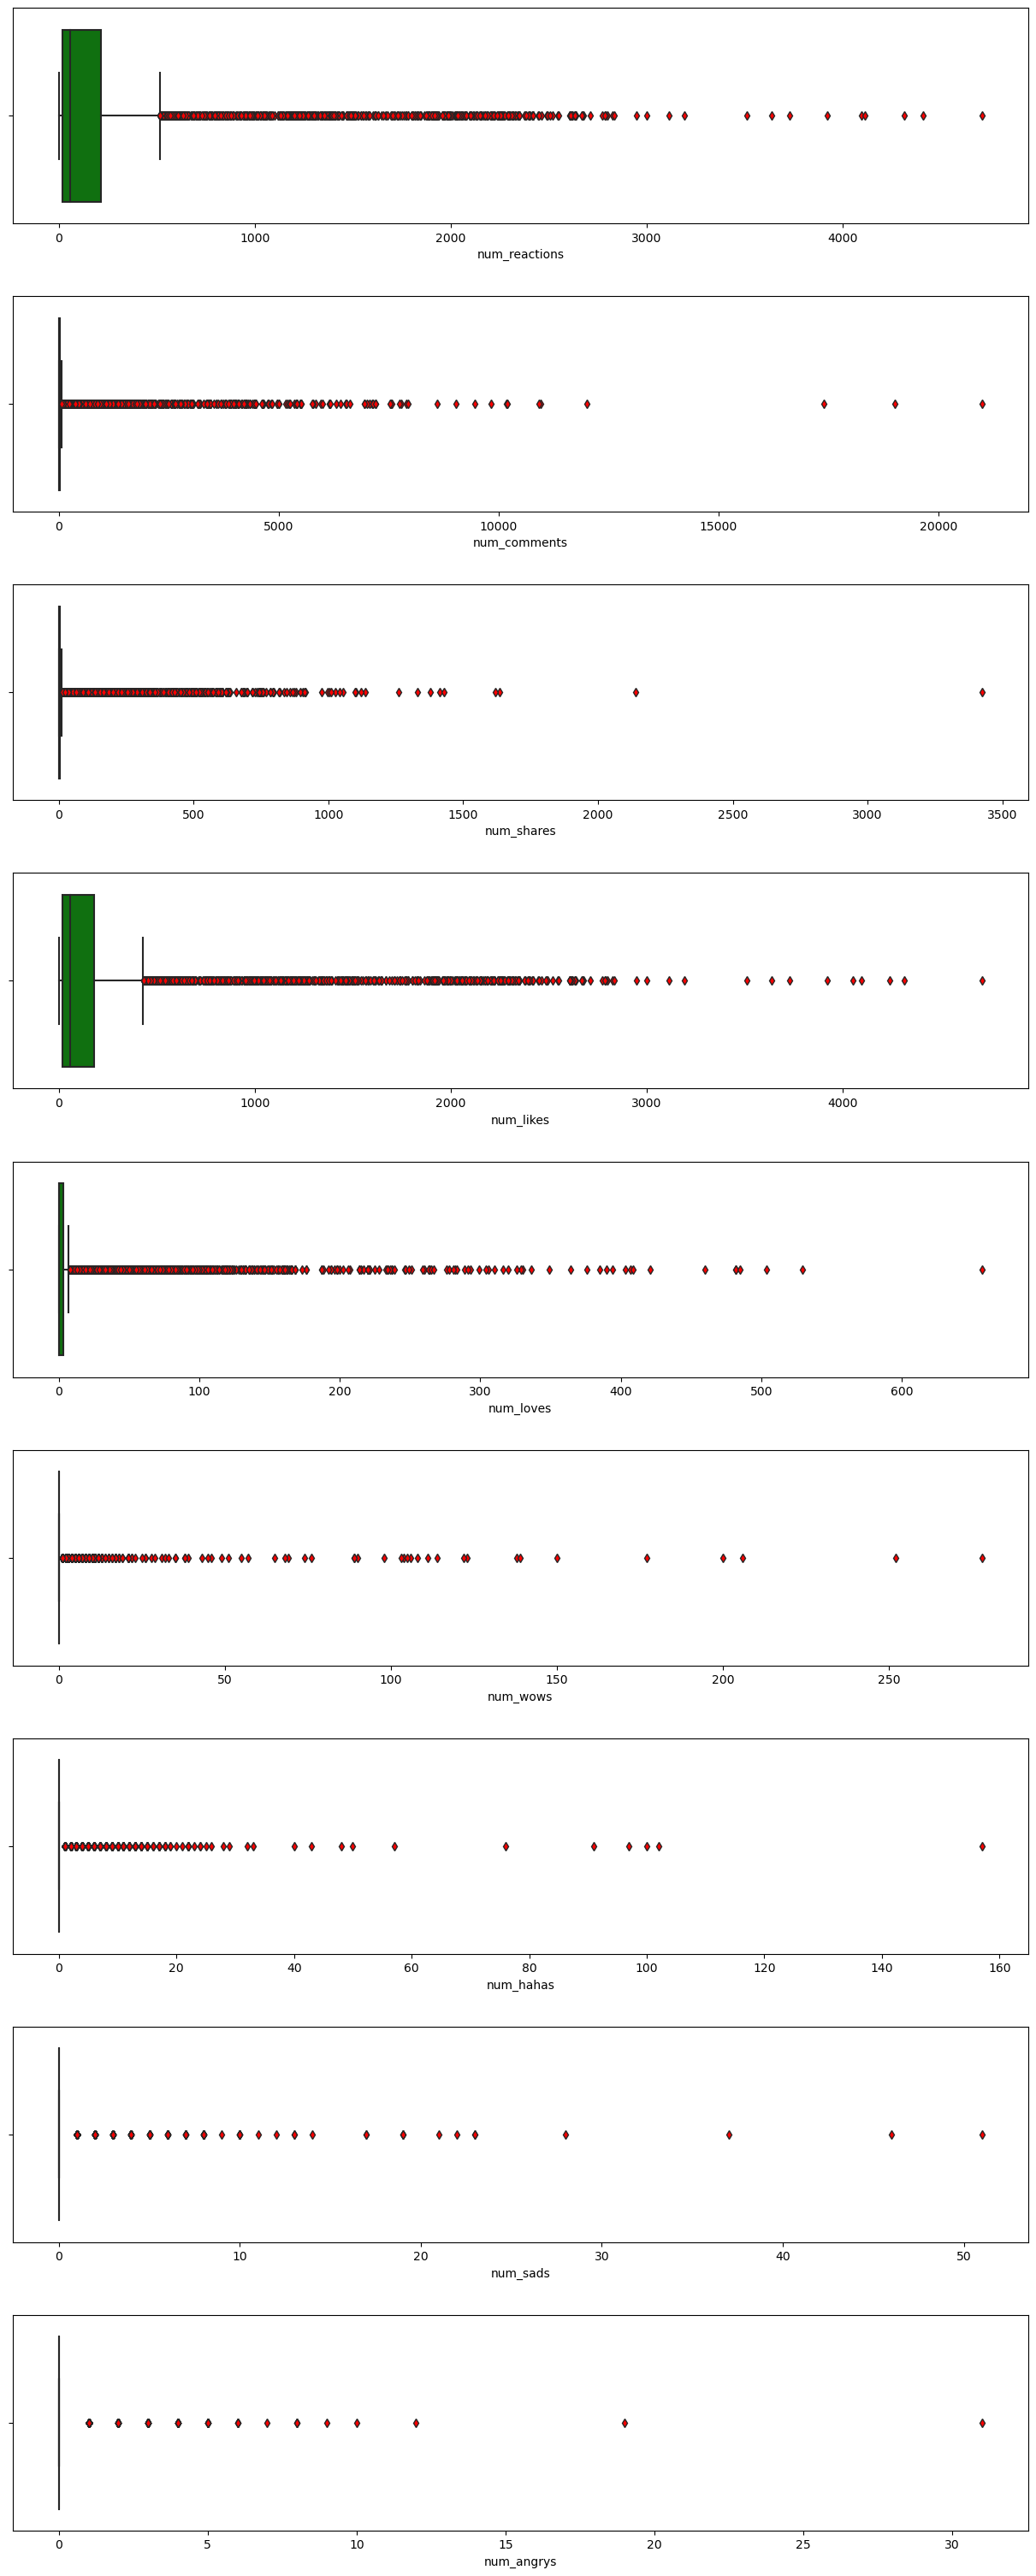

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(ncols=1, nrows=len(df._get_numeric_data().columns), figsize=(12, 30))
i = 0
axs = axs.flatten()
flierprops = dict( markerfacecolor='r', markersize=5, linestyle='none')   # per fer outliers vermells
for k,v in df._get_numeric_data().items():
    sns.boxplot(x=k, data=df._get_numeric_data(), ax=axs[i], color = 'g', flierprops=flierprops)
    i += 1
plt.tight_layout(pad=0.3, w_pad=1, h_pad=3.0)

plt.show()

### Preprocessat

Hem vist que no hi han variables amb distribució gausiana, i totes tenen outliers. Per fer el preprocesament fem una copia del dataframe. Utilitzarem el RobustScaler per les variables amb outliers (que són totes les numeriques) i farem One Hot Encoding (amb get_dummies) pels dies de la setmana, el periode del dia i el status_type. El metode get_dummies ens ho passa tot a True i False. Hem utlitzat el metode replace() per passar-ho tot a uns i zeros.

In [41]:
df_tr = df.copy()

In [42]:
from sklearn import preprocessing

# RobustScaler with outliers
RS = preprocessing.RobustScaler().fit(df_tr[with_outliers])
df_tr[with_outliers] = RS.transform(df_tr[with_outliers])

In [43]:
df_tr.head().T

,0,1,2,3,4
status_type,video,photo,video,photo,photo
status_published,4/22/2018 6:00,4/21/2018 22:45,4/21/2018 6:17,4/21/2018 2:29,4/18/2018 3:22
num_reactions,2.366834,0.462312,0.849246,0.266332,0.778894
num_comments,22.831461,-0.179775,10.426966,-0.179775,-0.179775
num_shares,65.5,0.0,14.25,0.0,0.0
num_likes,2.272727,0.563636,0.890909,0.327273,0.890909
num_loves,30.666667,0.0,7.0,0.0,3.0
num_wows,3.0,0.0,1.0,0.0,0.0
num_hahas,1.0,0.0,1.0,0.0,0.0
num_sads,1.0,0.0,0.0,0.0,0.0


In [44]:

df_tr = pd.get_dummies(df_tr, prefix= 'type', columns = ["status_type"], drop_first = True)
df_tr[['type_photo', 'type_status','type_video']] = df_tr[['type_photo', 'type_status','type_video']].replace({True: 1, False: 0})

df_tr = pd.get_dummies(df_tr, prefix= 'type', columns = ["weekday"], drop_first = True)
df_tr[['type_Monday', 'type_Tuesday', 'type_Wednesday','type_Thursday', 'type_Saturday','type_Sunday']] = df_tr[['type_Monday', 'type_Tuesday', 'type_Wednesday','type_Thursday', 'type_Saturday','type_Sunday']].replace({True: 1, False: 0})

df_tr = pd.get_dummies(df_tr, prefix= 'type', columns = ["day_part"], drop_first = True)
df_tr[['type_morning', 'type_noon','type_evening', 'type_night']] = df_tr[['type_morning', 'type_noon','type_evening', 'type_night']].replace({True: 1, False: 0})


In [45]:
df_tr.head().T

,0,1,2,3,4
status_published,4/22/2018 6:00,4/21/2018 22:45,4/21/2018 6:17,4/21/2018 2:29,4/18/2018 3:22
num_reactions,2.366834,0.462312,0.849246,0.266332,0.778894
num_comments,22.831461,-0.179775,10.426966,-0.179775,-0.179775
num_shares,65.5,0.0,14.25,0.0,0.0
num_likes,2.272727,0.563636,0.890909,0.327273,0.890909
num_loves,30.666667,0.0,7.0,0.0,3.0
num_wows,3.0,0.0,1.0,0.0,0.0
num_hahas,1.0,0.0,1.0,0.0,0.0
num_sads,1.0,0.0,0.0,0.0,0.0
num_angrys,0.0,0.0,0.0,0.0,0.0


Abans de començar l'exercici 1 de fer K-means clustering, farem el PCA. Per això abans ens hem de desfer de les columnes no numeriques 'status_published' i el timestamp 'time_st'.

In [46]:
df_tr = df_tr.drop(['status_published', 'time_st'], axis=1)
df_tr

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,type_photo,...,type_Monday,type_Saturday,type_Sunday,type_Thursday,type_Tuesday,type_Wednesday,type_evening,type_morning,type_night,type_noon
0,2.366834,22.831461,65.50,2.272727,30.666667,3.0,1.0,1.0,0.0,0,...,0,0,1,0,0,0,0,1,0,0
1,0.462312,-0.179775,0.00,0.563636,0.000000,0.0,0.0,0.0,0.0,1,...,0,1,0,0,0,0,0,0,1,0
2,0.849246,10.426966,14.25,0.890909,7.000000,1.0,1.0,0.0,0.0,0,...,0,1,0,0,0,0,0,1,0,0
3,0.266332,-0.179775,0.00,0.327273,0.000000,0.0,0.0,0.0,0.0,1,...,0,1,0,0,0,0,0,0,1,0
4,0.778894,-0.179775,0.00,0.890909,3.000000,0.0,0.0,0.0,0.0,1,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,0.155779,-0.179775,0.00,0.193939,0.000000,0.0,0.0,0.0,0.0,1,...,0,1,0,0,0,0,0,0,1,0
7046,-0.211055,-0.179775,0.00,-0.260606,0.333333,0.0,1.0,0.0,0.0,1,...,0,0,0,0,0,0,0,1,0,0
7047,-0.281407,-0.179775,0.00,-0.339394,0.333333,0.0,0.0,0.0,0.0,1,...,0,0,0,0,0,1,0,0,1,0
7048,1.472362,0.359551,5.50,1.769697,0.666667,0.0,0.0,0.0,0.0,1,...,0,0,0,0,1,0,0,0,1,0


### PCA

Com que tenim moltes dimensions, aprofitarem el PCA (Principal Component Analysis) per reduir la dimensionalitat del nostre dataset. Ho farem de manera que encara podem guardar un 95% de la informacio total en menos dimensions (2 o 3 o les que siguin)

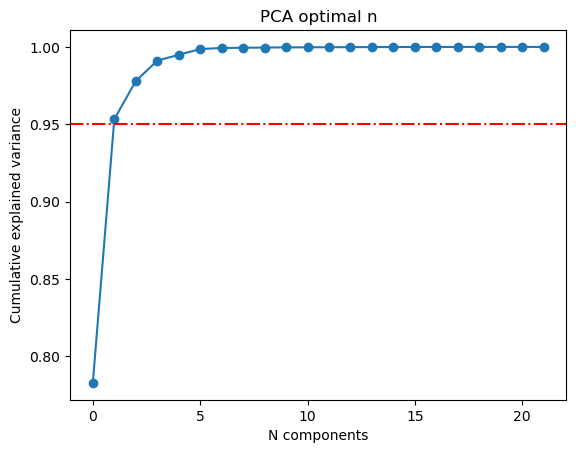

In [47]:
from sklearn.decomposition import PCA
pca = PCA().fit(df_tr)

plt.plot(np.cumsum(pca.explained_variance_ratio_), marker = "o")
plt.axhline(0.95, color = "red", linestyle = "-.")
plt.xlabel('N components')
plt.ylabel('Cumulative explained variance')
plt.title("PCA optimal n")
plt.show()

A la gràfica podem observar com el nombre de components que ens reservaran el 95% de la variança és 2. De tota manera ho podem mirar amb el següent codi:

In [48]:
pca = PCA(.95).fit(df_tr)    # per un 95% de variança
pca.n_components_

2

In [49]:
pca

PCA(n_components=0.95)

I ho pasem com a numero de components per al nostre model pca. Apliquem el nostre dataframe transformat i visualitzem una gràfica en 2 dimensions (el nombre de components és 2) amb els punts resultants. Aquest gràfic seria com un "mirall" a on es "reflecteixen" totes les altres variables. Haurem passat de 22 a 2 variables. Però treballar amb aquestes dues variables (PCA1 i PCA2) serà més fàcil per fer agrupacions. Per clusteritzar crearem un nou dataframe amb PCA1 i PCA2.

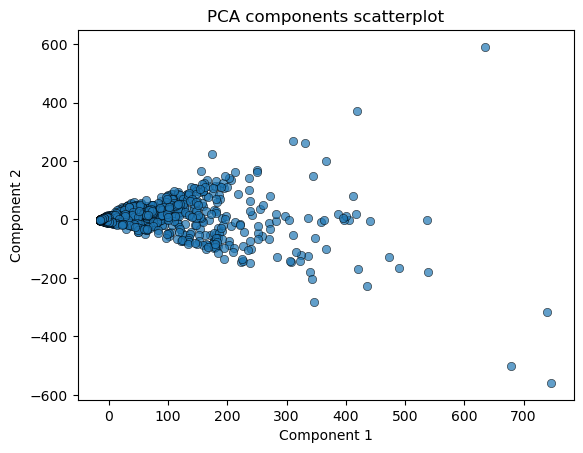

In [50]:
pca = PCA(n_components=pca.n_components_)
df_pca = pca.fit_transform(df_tr)

sns.scatterplot(x=df_pca[:,0], y=df_pca[:,1], edgecolor='black', alpha=0.7)
plt.ylabel('Component 2')
plt.xlabel('Component 1')
plt.title("PCA components scatterplot")
plt.show()

In [51]:
df_pca[:,0]

array([ 48.36330809, -14.81260262,   3.3965225 , ..., -14.76102824,
       -10.97496776, -14.824164  ])

In [52]:
df_pca[:,1]

array([38.95915354, -2.18958705,  3.41525966, ..., -2.12214718,
        1.59956014, -2.21056866])

In [53]:
pca

PCA(n_components=2)

In [54]:
print(df_tr.shape)
print(df_pca.shape)

(6996, 22)
(6996, 2)


In [55]:
df_pca

array([[ 48.36330809,  38.95915354],
       [-14.81260262,  -2.18958705],
       [  3.3965225 ,   3.41525966],
       ...,
       [-14.76102824,  -2.12214718],
       [-10.97496776,   1.59956014],
       [-14.824164  ,  -2.21056866]])

In [56]:
df_pca = pd.DataFrame(df_pca, columns=["PCA1", "PCA2"])
df_pca

,PCA1,PCA2
0,48.363308,38.959154
1,-14.812603,-2.189587
2,3.396523,3.415260
3,-14.816733,-2.196188
4,-14.200258,-1.347605
...,...,...
6991,-14.819062,-2.199911
6992,-14.723804,-2.090472
6993,-14.761028,-2.122147
6994,-10.974968,1.599560


## Exercici 1: K-means clustering

En aquest metode no supervisat de clusterització hi ha un paràmetre clau, que és el nombre de clusters (k). EL que farem és calcular el SSE (sum of squared errors) en funció del nombre de clusters. Després aplicarem el metode de 'elbow'.

In [57]:
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score

# A list holds the SSE values for each k
sse = []

for k in range(1, 15):
    kmeans_mod = KMeans(n_clusters = k, random_state = 42)
    kmeans_mod.fit(df_pca)
    sse.append(kmeans_mod.inertia_)

print(sse)

[19925396.26820548, 8915846.966438197, 5945856.979959406, 4526010.115321703, 3426403.029900629, 2759788.2217308595, 2060761.8999210033, 1738808.1162678772, 1516340.7254331214, 1349866.4910653369, 1203171.919608795, 1056426.005763719, 961426.3168754932, 858050.3601748504]


Abans de graficar els resultats de SSE en funció de k, introduirem aquí el concepte del coeficient de Silhouette. Aquest paràmetre ens dona informació de quant bo és el rendiment i la qualitat de l'agrupament dels clusters. És millor com més a prop de 1. Graficarem tots dos parametres junts en funció de k amb valors de k fins a 15.

In [58]:

# A list holds the silhouette values for each k
silhouette_coefficients = []

for k in range(2, 15):
    kmeans_mod = KMeans(n_clusters = k, random_state = 42)
    kmeans_mod.fit(df_pca)
    silhouette_coefficients.append(silhouette_score(df_pca, kmeans_mod.labels_))

print(silhouette_coefficients)

[0.9021405268020648, 0.8764464236975943, 0.866974701670711, 0.8726142339373919, 0.8725382236219946, 0.8732617597156985, 0.8693147236057253, 0.8697826710187025, 0.8622687365447838, 0.8618308821002489, 0.8522615677466193, 0.8522828103976131, 0.8490289945736114]


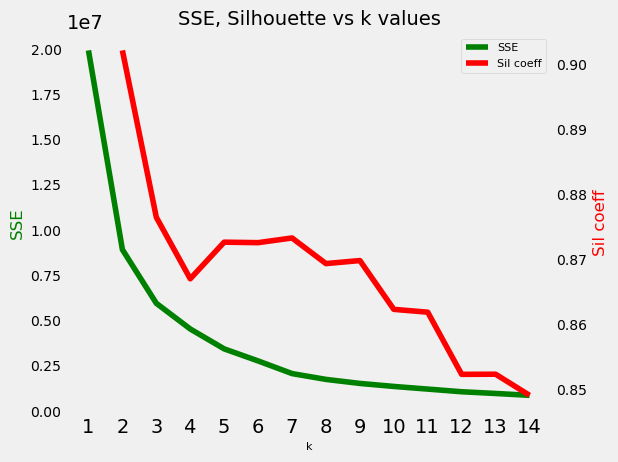

In [59]:
plt.style.use("fivethirtyeight")

fig, ax1 = plt.subplots()
fig.subplots_adjust(right=0.75)

ax2 = ax1.twinx()

p1, = ax1.plot(range(1, 15), sse, color = 'g', label="SSE")
p2, = ax2.plot(range(2, 15), silhouette_coefficients, color = 'r', label="Sil coeff")

ax1.set_xlabel('k',  fontsize=8)
plt.xticks(range(1, 15))
ax1.set_ylabel("SSE", color = 'g', fontsize=12)
ax2.set_ylabel("Sil coeff", color = 'r', fontsize=12)

ax1.tick_params(axis='y', labelsize=10)
ax2.tick_params(axis='y', labelsize=10)

ax1.grid(False)
ax2.grid(False)

plt.legend(handles=[p1, p2], fontsize=8)

plt.tight_layout()
plt.title("SSE, Silhouette vs k values",  fontsize=14)
plt.show()

Aquí veiem que el valor més alt de Silhouette és per a k igual a 2. De tota manera utilitzarem el metode 'elbow' per escollir el nombre de clusters. Aquest metode es basa en que si agafem molt pocs clusters, el SSE és molt gran, però si n'agafem molts, tot i que el SSE serà molt petit, estarem comentent overfitting. Hi ha un punt a on afegir clusters fa que el SSE no disminueixi tant. Per calcular-ho utilitzem el KneeLocator. I amb el resultat de k creem el nostre model K-Means amb init = k-means++

In [60]:
kl = KneeLocator(
    range(1, 15), sse, curve="convex", direction="decreasing"
)

print(kl.elbow)

3


In [61]:
kmeans = KMeans(
    init = 'k-means++',
    #init="random",
    n_clusters=kl.elbow,
    #n_init=10,
    #max_iter=300,
)

kmeans.fit(df_pca)

KMeans(n_clusters=3)

In [62]:
pred_labels = kmeans.predict(df_pca)
pred_labels

array([1, 0, 0, ..., 0, 0, 0])

In [63]:
kmeans.inertia_

5945856.979959406

In [64]:
kmeans.cluster_centers_

array([[-11.04981807,  -1.16925282],
       [ 99.70753658,  24.62682429],
       [331.93328934, -57.73930691]])

In [65]:
kmeans.n_iter_

8

In [66]:
kmeans.labels_

array([1, 0, 0, ..., 0, 0, 0])

In [67]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)    # how many in each cluster
print(dict(zip(unique, counts)))

{0: 6449, 1: 475, 2: 72}


In [68]:
import numpy as np
np.unique(kmeans.labels_)

array([0, 1, 2])

A continuació grafiquem el resultat dels 3 clusters obtinguts amb k-Means així com els seus centroides amb una creu negra. Després afegim al nostre dataframe original una nova columna amb el cluster corresponent a cada registre (kmeans.labels_) per poder treure conclusions.

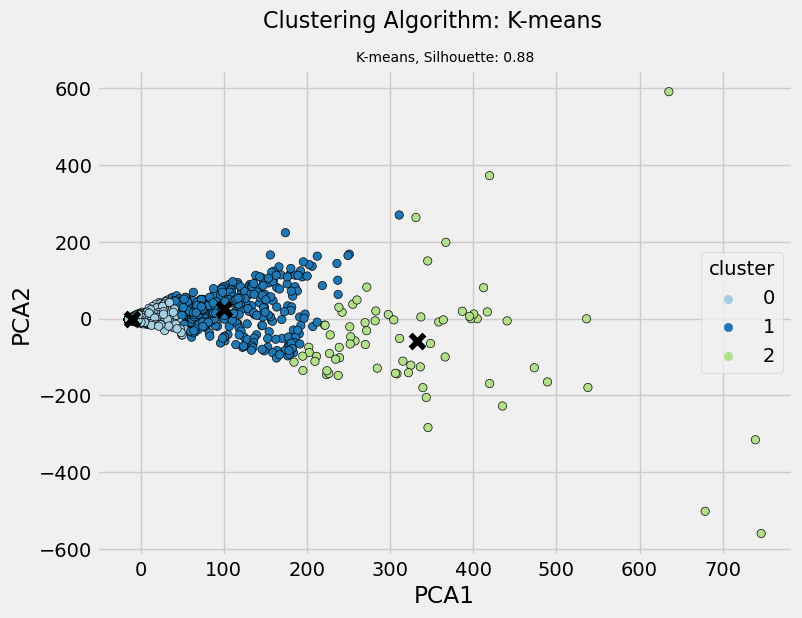

In [69]:
# Plot the data and cluster silhouette comparison

fig, (ax1) = plt.subplots(figsize=(8, 6))

fig.suptitle(f"Clustering Algorithm: K-means", fontsize=16)
#colors = [plt.get_cmap('terrain')(i) for i in np.linspace(0, 1, len(np.unique(kmeans.labels_)))]

# The k-means plot

#ax1.scatter(df_pca['PCA1'], df_pca['PCA2'], c=[colors[label] for label in kmeans.labels_], edgecolors='black')

ax1.set_title(
    f"K-means, Silhouette: {silhouette_score(df_pca, kmeans.labels_).round(2)}",
    fontdict={"fontsize": 10}
)

sns.scatterplot(x='PCA1', y='PCA2', hue=kmeans.labels_, data=df_pca, palette='Paired', edgecolor='black');
ax1.legend(loc='right', title="cluster")

centroids = kmeans.cluster_centers_
ax1.scatter(centroids[:,0] , centroids[:,1] , s = 100, color = 'black', marker='x')

plt.show()


In [70]:
df['kmeans_k'] = kmeans.labels_      # nova columna amb els labels dels clusters
df.head()

C:\Users\WotanJr\AppData\Local\Temp\ipykernel_18832\1515025104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kmeans_k'] = kmeans.labels_      # nova columna amb els labels dels clusters


,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,time_st,weekday,day_part,kmeans_k
0,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,2018-04-22 06:00:00,Sunday,morning,1
1,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,2018-04-21 22:45:00,Saturday,night,0
2,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,2018-04-21 06:17:00,Saturday,morning,0
3,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,2018-04-21 02:29:00,Saturday,night,0
4,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,2018-04-18 03:22:00,Wednesday,night,0


In [71]:
df['kmeans_k'].value_counts().sort_index()

kmeans_k
0    6449
1     475
2      72
Name: count, dtype: int64

Amb el value_counts podem observar que la gran majoria de registres (92 %) pertanyen al cluster 0. Un 7 % pertanyen al cluster 1 i un 1 % de punts molt dispersos pertanyen al cluster 2. Per analitzar-ho, començarem fent un cop d'ull a les variable categoriques. Ho farem graficant el resultat de groupby's amb count's.

In [72]:
df.groupby(['weekday','kmeans_k'])['weekday'].count()

weekday    kmeans_k
Friday     0           923
           1            71
           2             8
Monday     0           913
           1            61
           2            11
Saturday   0           894
           1            70
           2            12
Sunday     0           969
           1            72
           2             8
Thursday   0           890
           1            71
           2            11
Tuesday    0           959
           1            71
           2             9
Wednesday  0           901
           1            59
           2            13
Name: weekday, dtype: int64

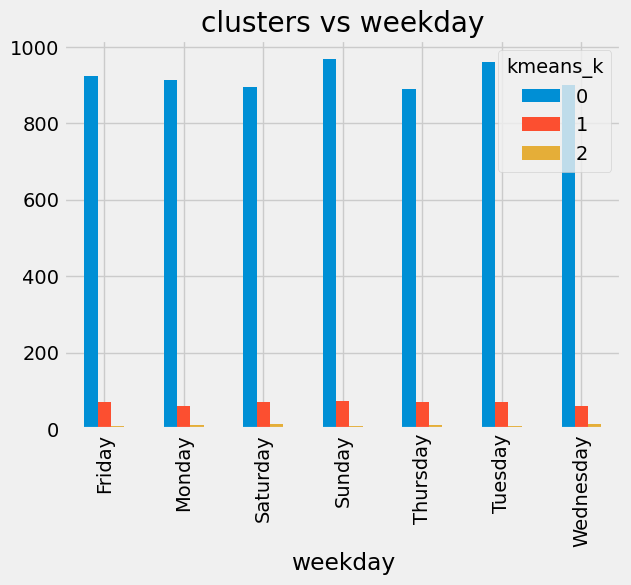

In [73]:
df.groupby(['weekday','kmeans_k'])['weekday'].count().unstack().plot(kind = 'bar')
plt.title("clusters vs weekday")
plt.show()

In [74]:
df.groupby(['day_part','kmeans_k'])['day_part'].count()

day_part   kmeans_k
afternoon  0             11
evening    0            224
           1              3
           2              1
morning    0           2430
           1            270
           2             57
night      0           3623
           1            194
           2             14
noon       0            161
           1              8
Name: day_part, dtype: int64

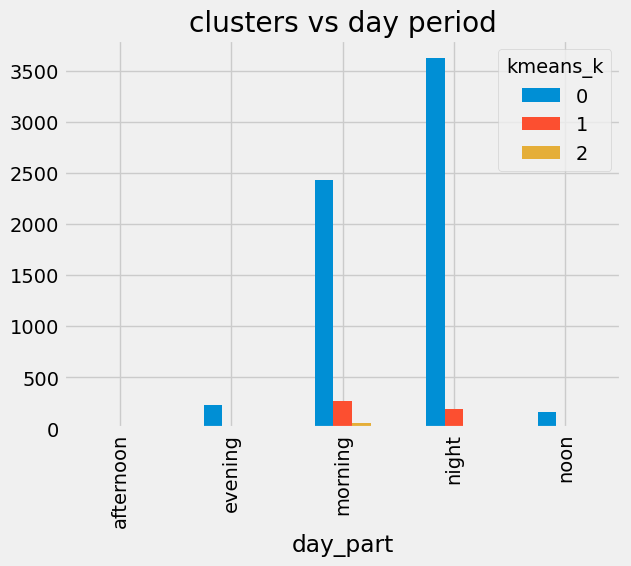

In [75]:
df.groupby(['day_part','kmeans_k'])['day_part'].count().unstack().plot(kind = 'bar')
plt.title("clusters vs day period")
plt.show()

In [76]:
df.groupby(['status_type','kmeans_k'])['status_type'].count()

status_type  kmeans_k
link         0             63
photo        0           4239
             1              2
             2              1
status       0            359
video        0           1788
             1            473
             2             71
Name: status_type, dtype: int64

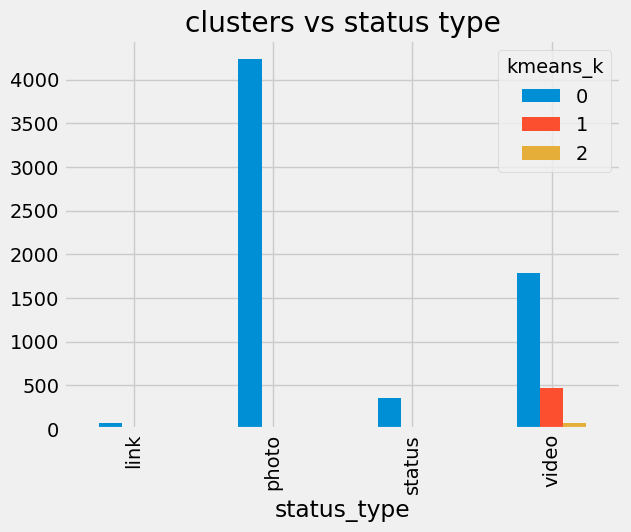

In [77]:
df.groupby(['status_type','kmeans_k'])['status_type'].count().unstack().plot(kind = 'bar')
plt.title("clusters vs status type")
plt.show()

El dia de la setmana i el periode del dia no han influit. Podem confirmar que la practica totalitat dels links, de les fotos i dels status pertanyen al cluster 0. Una part dels videos també.

També podem observar que els clusters 1 i 2 han sigut adjudicats a 'video', i no els trobem a cap altra status. Hem de trobar el motiu pel qual l'algoritme ho ha adjudicat així. Per això analitzarem ara les variables numeriques, ho farem amb boxplots, per trobar les diferencies entre clusters.

Com hem vist a l'últim gràfic de les variables categoriques que les diferencies entre clusters estan enfocades en els videos, ho farem per aquesta part de la base de dades:

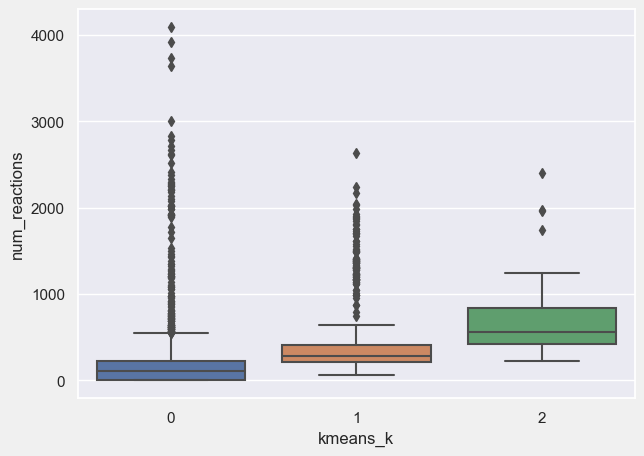

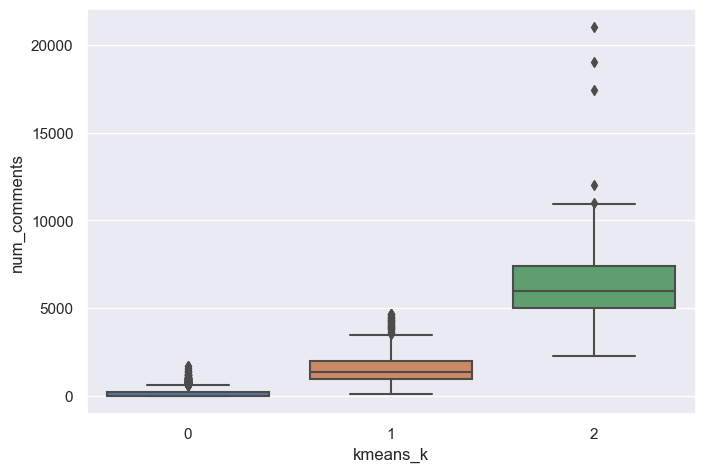

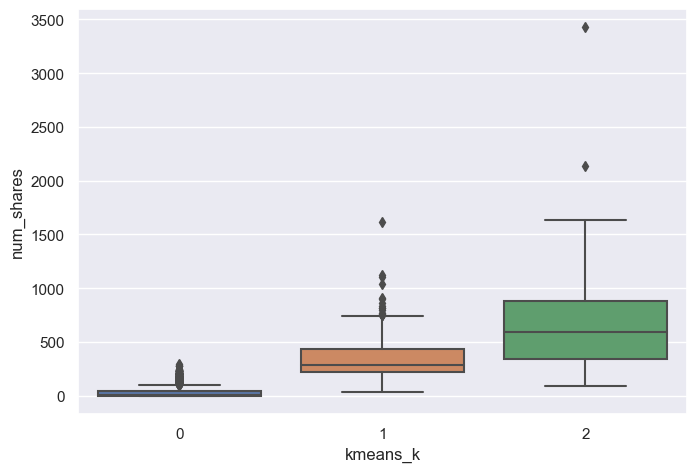

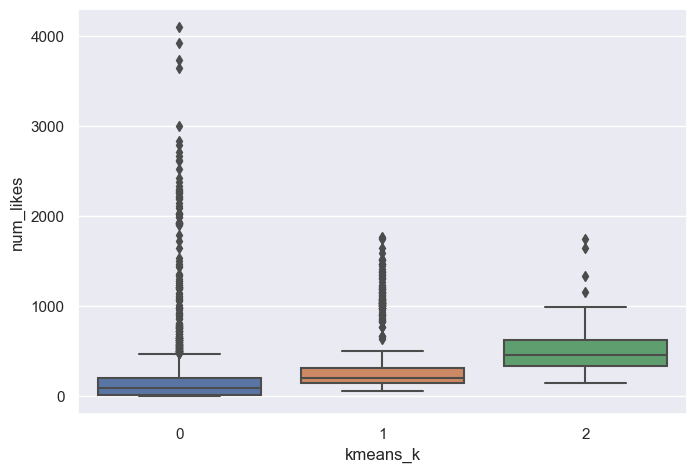

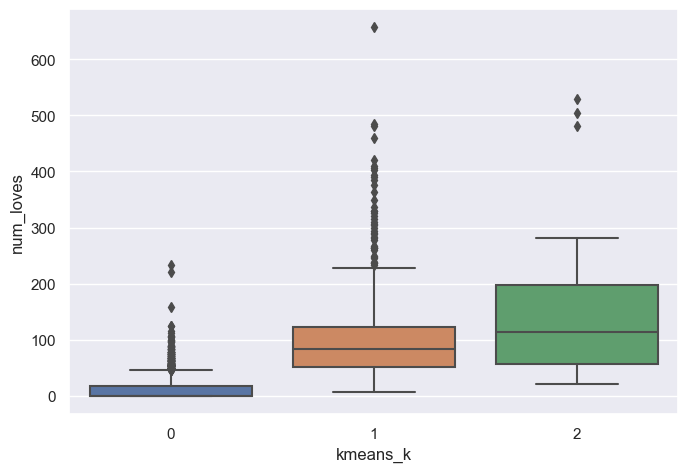

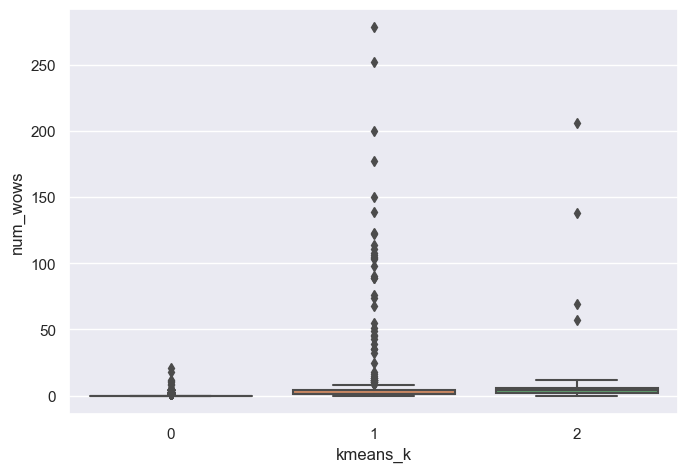

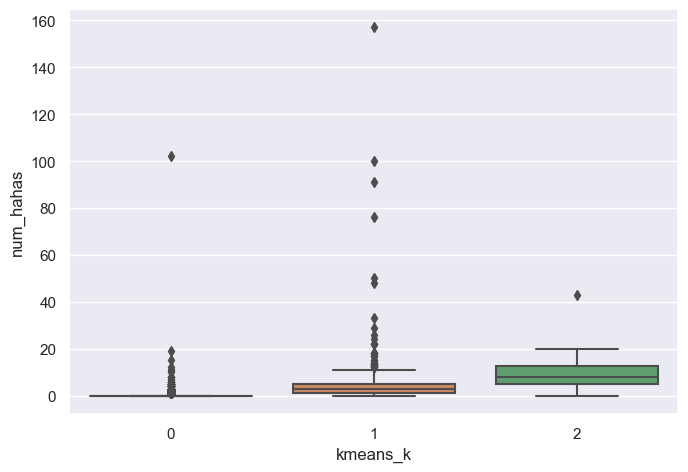

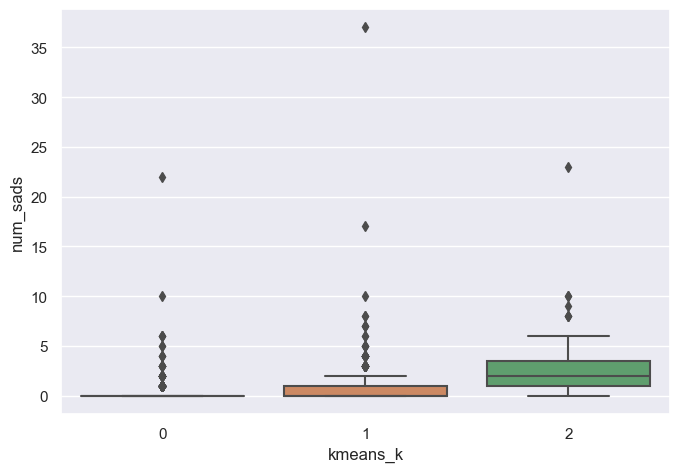

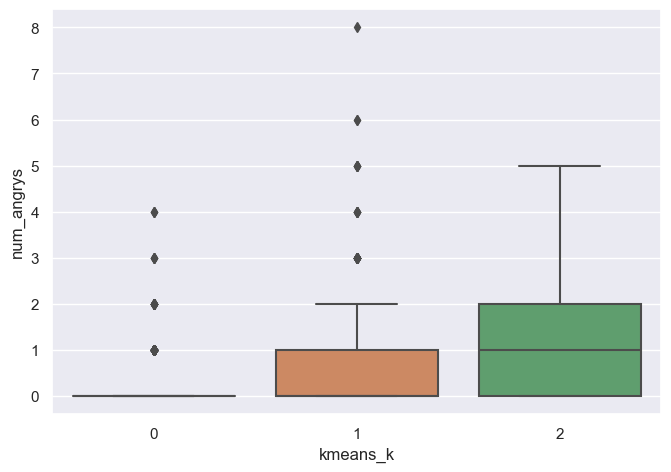

In [78]:
for i in df._get_numeric_data().drop(['kmeans_k'], axis=1).columns:
    plt.figure()
    sns.set(rc={"figure.figsize":(7, 5)})
    plt.tight_layout()
    sns.boxplot(x='kmeans_k', y=i, data=df[df['status_type']=='video'])

Hem pogut observar que en termes de mitjana el cluster 2 té un nombre de comentaris i shares molt superiors. En el cas del cluster 0 són molt baixos, i pel cluster 1, hi ha un terme mitjà. Val a dir que també és el cas (tot i que no amb tanta diferencia) per a reactions i likes. 

Ho podem veure també en series temporals.

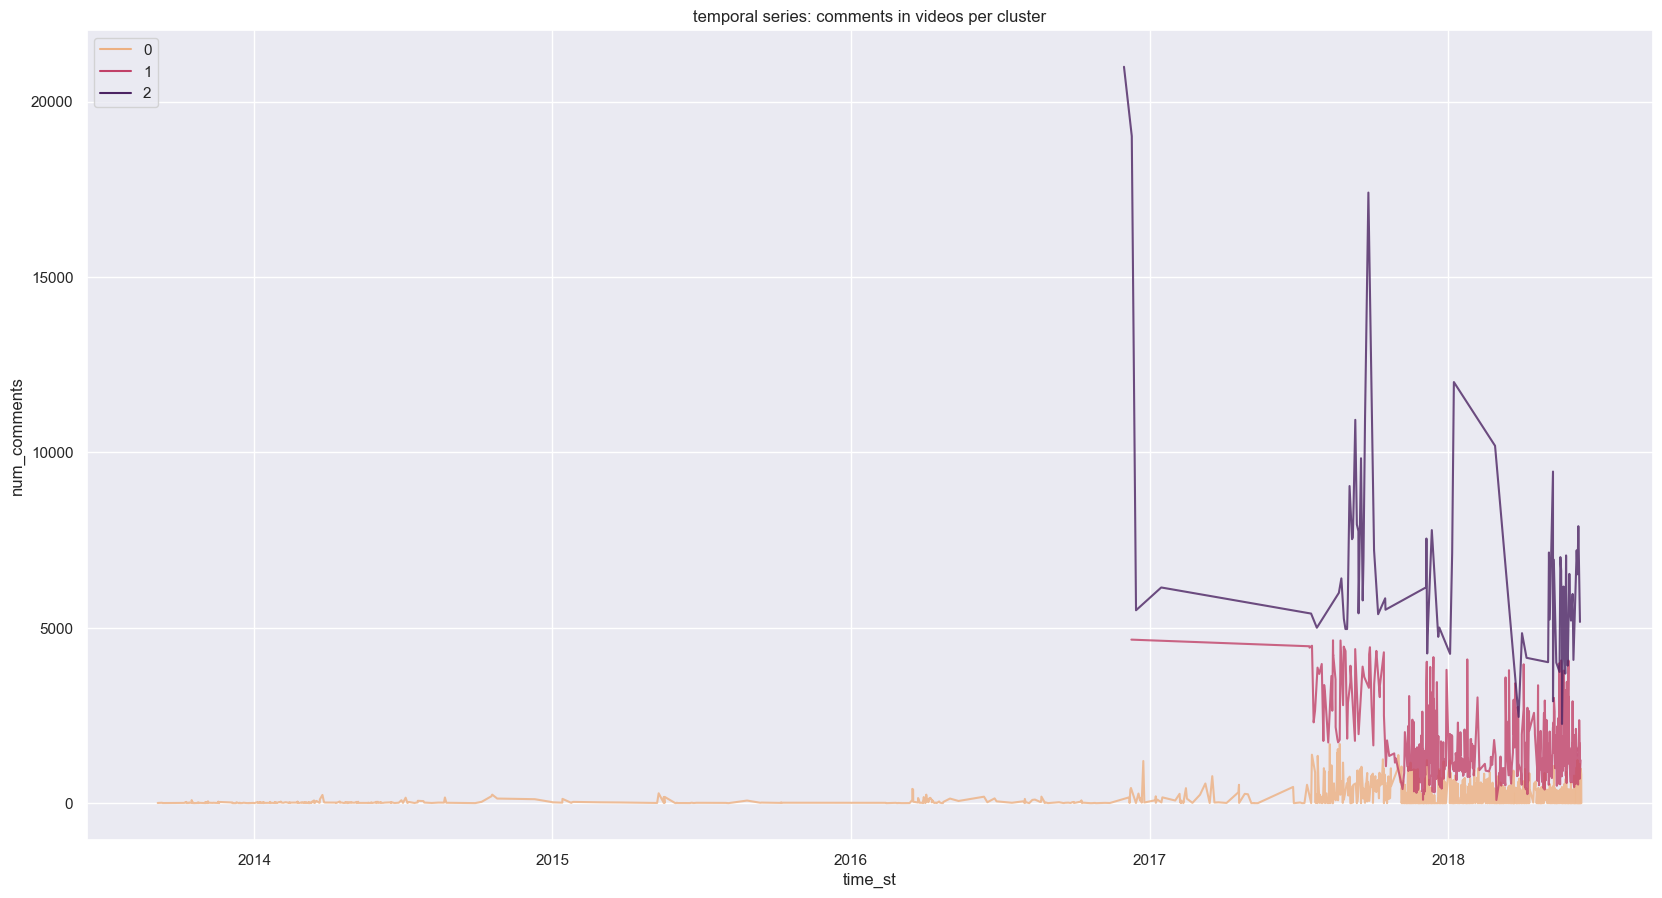

In [79]:
plt.figure(figsize=(18,10))

sns.lineplot(x=df.time_st, y=df[df['status_type']=='video'].num_comments, alpha=0.8, hue=df['kmeans_k'], palette='flare')

plt.legend(loc="upper left")
plt.title("temporal series: comments in videos per cluster")
plt.show()

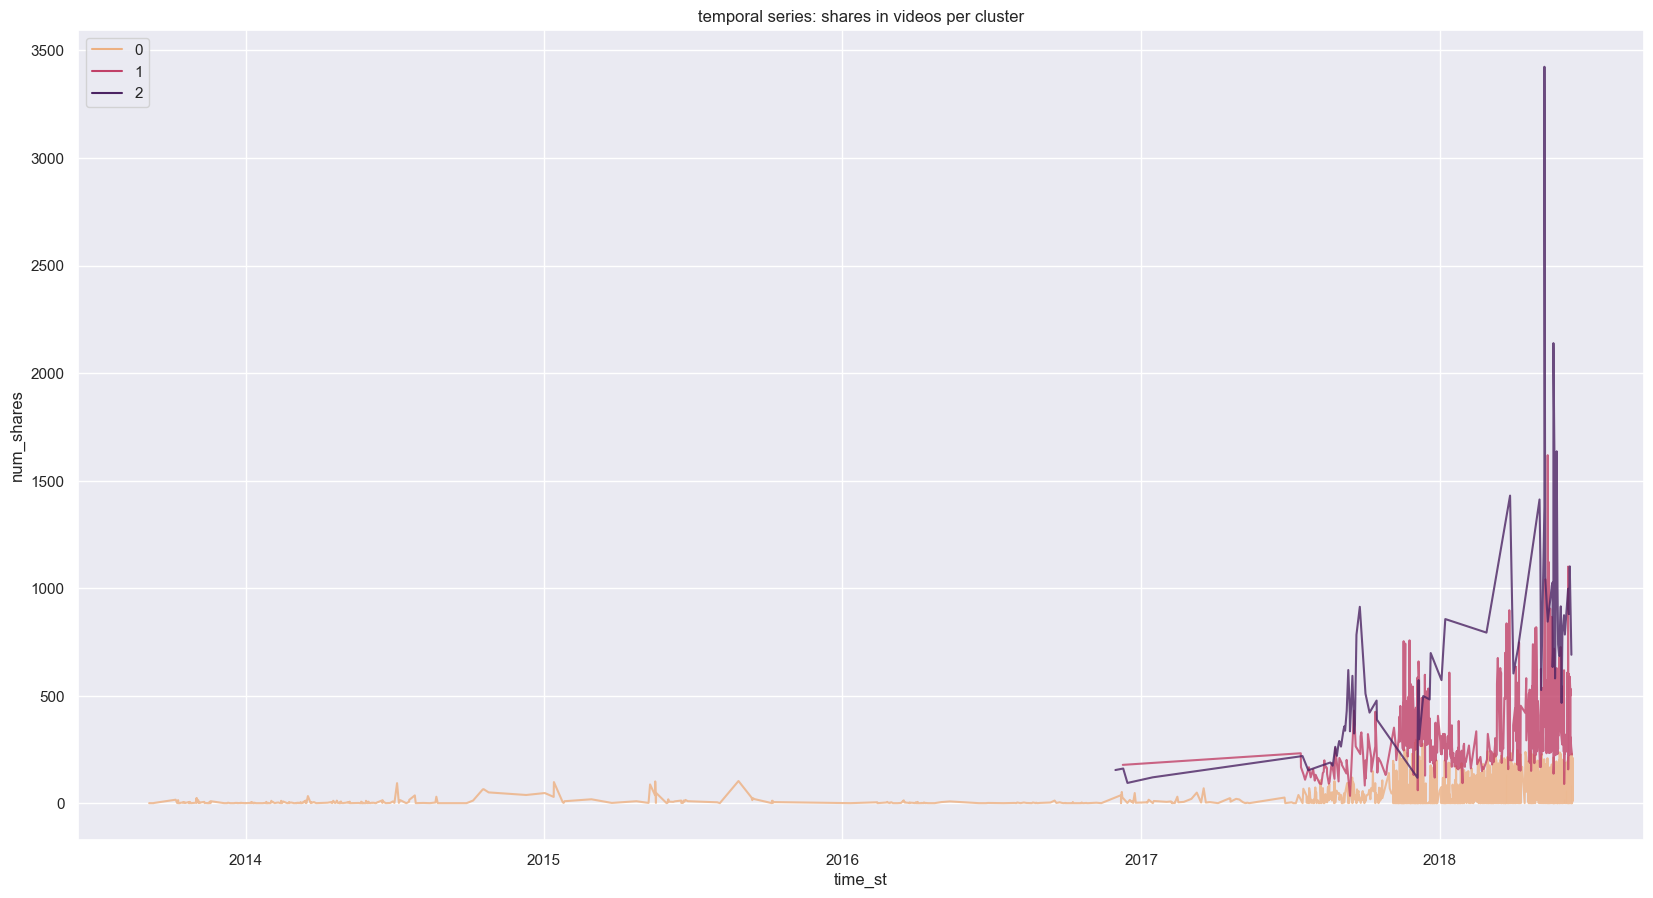

In [80]:
plt.figure(figsize=(18,10))

sns.lineplot(x=df.time_st, y=df[df['status_type']=='video'].num_shares, alpha=0.8, hue=df['kmeans_k'], palette='flare')

plt.legend(loc="upper left")
plt.title("temporal series: shares in videos per cluster")
plt.show()

## Exercici 2: Hierarchical Clustering

En aquest metode no supervisat de clusterització, no cal haver d'escollir la k. Quan fem el dendogram, ho podem trobar graficament. Utilitzarem el de tipus aglomeratiu

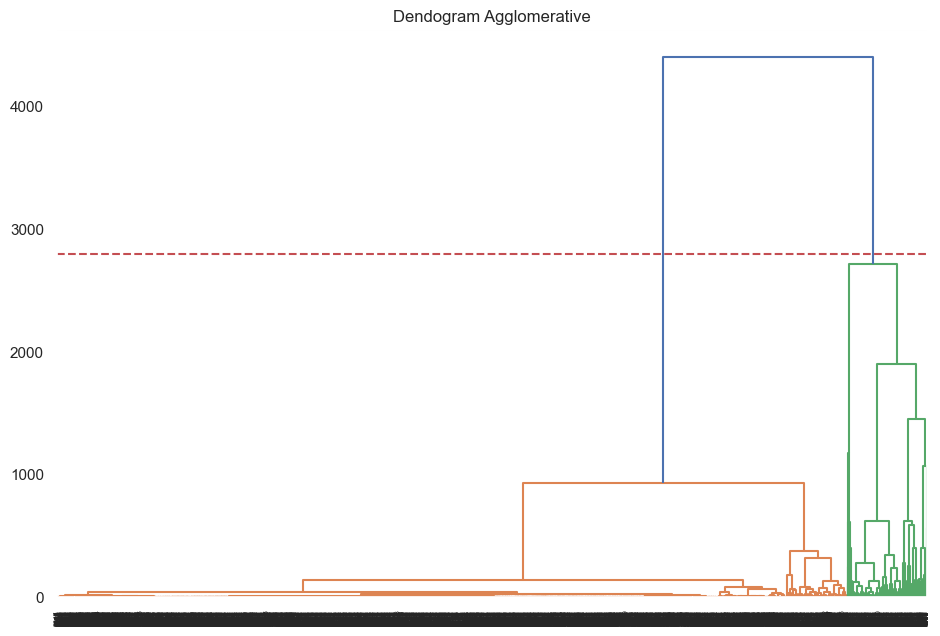

In [81]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
dend_ward = shc.dendrogram(shc.linkage(df_pca, method='ward'))
plt.title("Dendogram Agglomerative")
plt.axhline(y=2800, color='r', linestyle='--')
plt.show()

Observem que el nombre de clusters més addient és 2. En forma de codi es pot posar com el nombre de colors del grafic menys 1.

Amb aquest parametre ara crearem el nostre model jerarquic. Tornarem a fer la mateixa grafica del coeficient de Silhouette en funció de k per aquest model.

In [82]:
set(dend_ward['color_list'])

{'C0', 'C1', 'C2'}

In [83]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = (len(set(dend_ward['color_list']))-1), affinity = 'euclidean', linkage = 'ward')    # k = colors - 1
cluster.fit_predict(df_pca)


array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

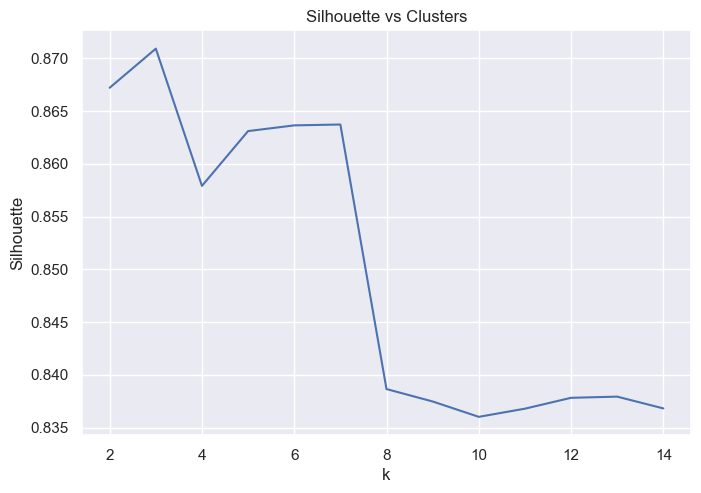

In [84]:
silhouette_coefficients_HC = []

for k in range(2, 15):
    AHC = AgglomerativeClustering(n_clusters=k ,affinity='euclidean', linkage='ward')
    cluster_labels = AHC.fit_predict(df_pca)
    silhouette_coefficients_HC.append((silhouette_score(df_pca, cluster_labels)))

#print(silhouette_coefficients_HC)

plt.plot(range(2, 15), silhouette_coefficients_HC)
plt.xlabel('k')
plt.ylabel('Silhouette')
plt.title('Silhouette vs Clusters')
plt.show()

In [85]:
cluster.labels_

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

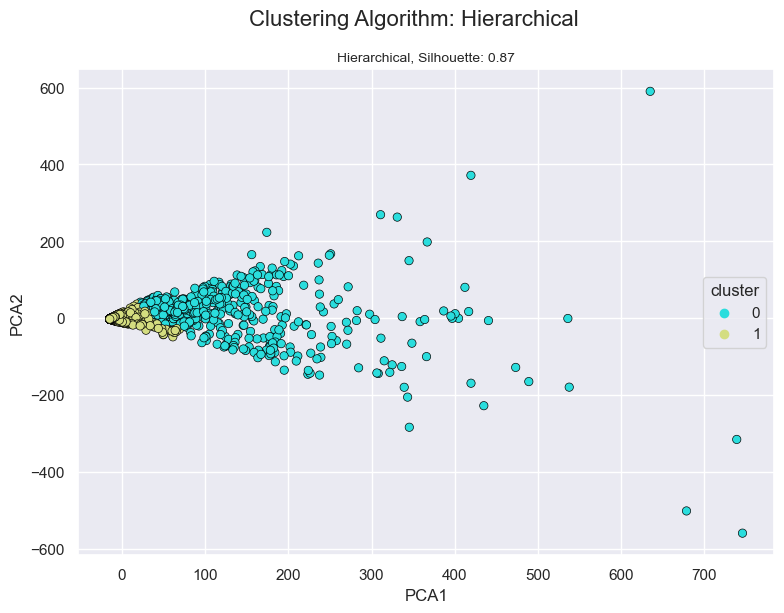

In [86]:
# Plot the data and cluster silhouette comparison

fig, (ax1) = plt.subplots(figsize=(8, 6))

fig.suptitle(f"Clustering Algorithm: Hierarchical", fontsize=16)

# The plot
#ax1.scatter(df_pca['PCA1'], df_pca['PCA2'], c=cluster.labels_, edgecolors='grey')

sns.scatterplot(x='PCA1', y='PCA2', hue=cluster.labels_, data=df_pca, palette='rainbow', edgecolor='black');
ax1.legend(loc='right', title="cluster")

ax1.set_title(
    f"Hierarchical, Silhouette: {silhouette_score(df_pca, cluster.labels_).round(2)}",
    fontdict={"fontsize": 10}
)

plt.show()

Hem pogut observar que el valor màxim de Silhouette es per k igual a 3, però es que la diferència amb k igual a 2 és molt petita, per la qual cosa ens quedarem amb k igual a 2. A la grafica del components principals podem veure que el cluster 1 recorda bastant al cluster 0 de K-Means, però millor no avancem res. Afegirem al nostre dataframe original una altra columna amb el cluster corresponent a cada registre (cluster.labels_) per poder treure conclusions.

In [87]:
df['k_HC'] = cluster.labels_    # nova columna amb els labels dels clusters
df.head()

C:\Users\WotanJr\AppData\Local\Temp\ipykernel_18832\298547579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['k_HC'] = cluster.labels_    # nova columna amb els labels dels clusters


,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,time_st,weekday,day_part,kmeans_k,k_HC
0,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,2018-04-22 06:00:00,Sunday,morning,1,0
1,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,2018-04-21 22:45:00,Saturday,night,0,1
2,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,2018-04-21 06:17:00,Saturday,morning,0,1
3,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,2018-04-21 02:29:00,Saturday,night,0,1
4,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,2018-04-18 03:22:00,Wednesday,night,0,1


In [88]:
df['k_HC'].value_counts().sort_index()

k_HC
0     639
1    6357
Name: count, dtype: int64

La gran majoria de registres (90,9 %) pertanyen al cluster 1 i un 9,1 % pertanyen al cluster 0. . Per analitzar-ho, començarem fent un cop d'ull a les variable categoriques. Ho farem graficant el resultat de groupby's amb count's.

In [89]:
df.groupby(['weekday','k_HC'])['weekday'].count()

weekday    k_HC
Friday     0        89
           1       913
Monday     0        81
           1       904
Saturday   0        98
           1       878
Sunday     0       101
           1       948
Thursday   0        98
           1       874
Tuesday    0        92
           1       947
Wednesday  0        80
           1       893
Name: weekday, dtype: int64

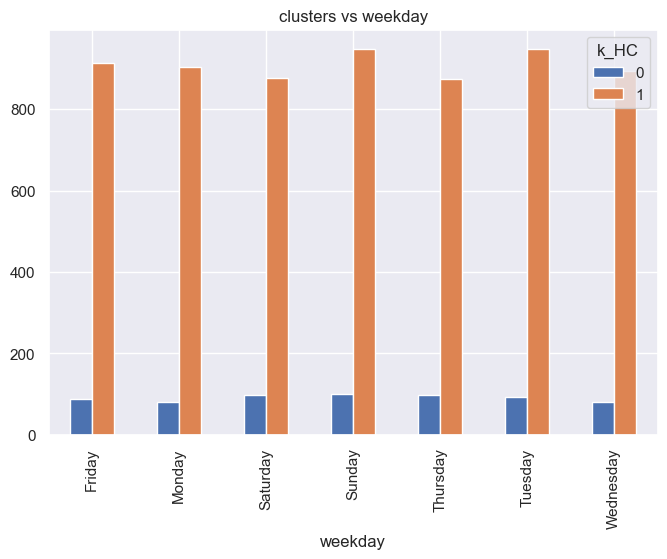

In [90]:
df.groupby(['weekday','k_HC'])['weekday'].count().unstack().plot(kind = 'bar')
plt.title("clusters vs weekday")
plt.show()

In [91]:
df.groupby(['day_part','k_HC'])['day_part'].count()

day_part   k_HC
afternoon  1         11
evening    0          5
           1        223
morning    0        366
           1       2391
night      0        260
           1       3571
noon       0          8
           1        161
Name: day_part, dtype: int64

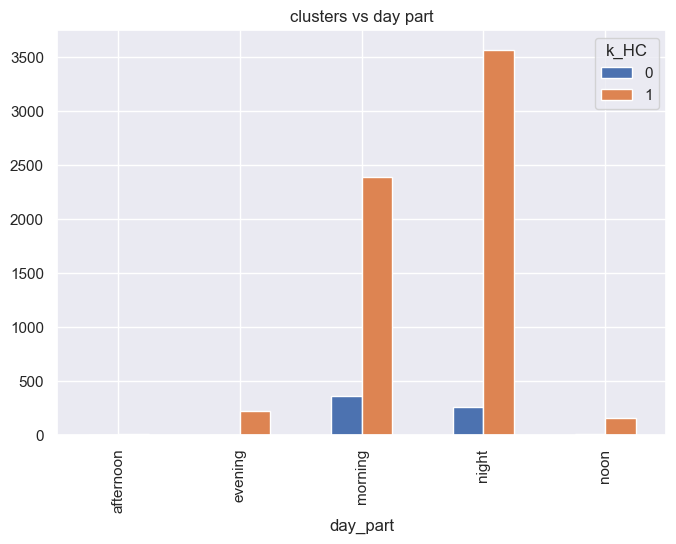

In [92]:
df.groupby(['day_part','k_HC'])['day_part'].count().unstack().plot(kind = 'bar')
plt.title("clusters vs day part")
plt.show()

In [93]:
df.groupby(['status_type','k_HC'])['status_type'].count()

status_type  k_HC
link         1         63
photo        0          4
             1       4238
status       1        359
video        0        635
             1       1697
Name: status_type, dtype: int64

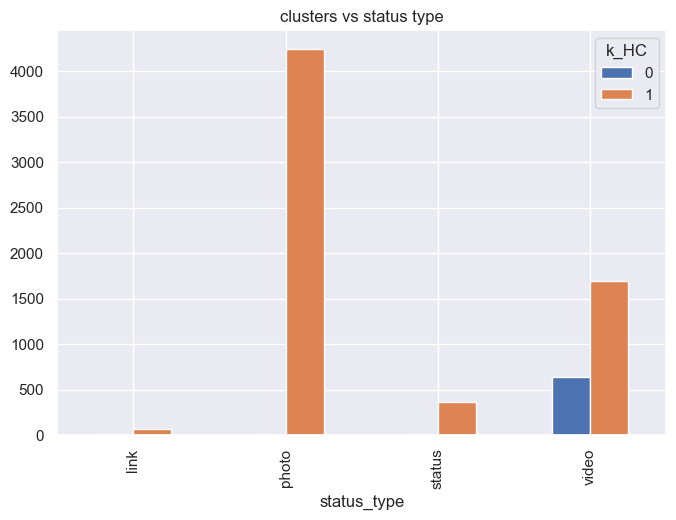

In [94]:
df.groupby(['status_type','k_HC'])['status_type'].count().unstack().plot(kind = 'bar')
plt.title("clusters vs status type")
plt.show()

In [95]:
df[df['k_HC']==0].status_type.value_counts()

status_type
video    635
photo      4
Name: count, dtype: int64

El dia de la setmana i el periode del dia no han influit.

Hem pogut veure que aquest tipus de clustering ha separat el cluster 0 per uns videos que probablement tindran algun tipus de caracteristica. La resta de videos, i la practica totalitat dels links, fotos i status estan englobats al cluster 1.

Farem un cop d'ull ara a les variables numeriques en forma de boxplot i separades per cluster. Farem com abans, ens centrarem en la part del dataset de 'video' per poder veure per quina caracteristica s'han separat els videos de cluster 0 i 1.

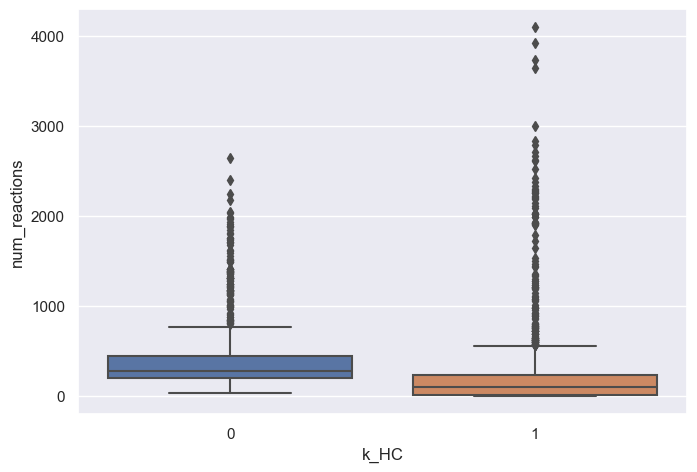

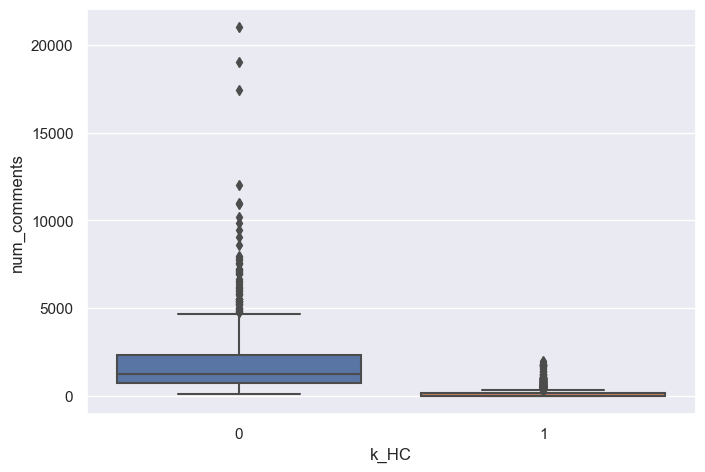

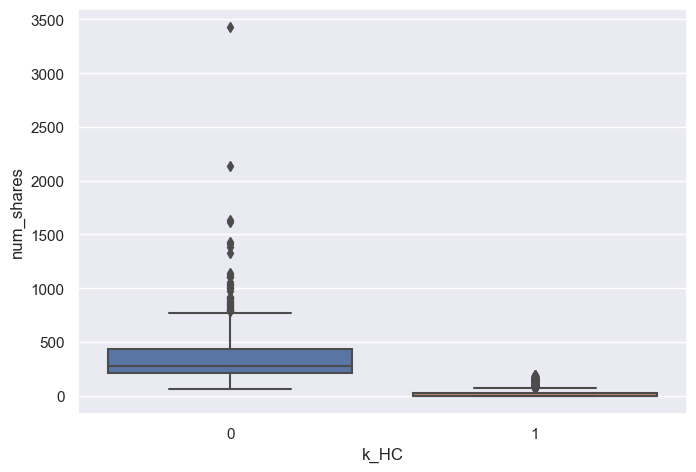

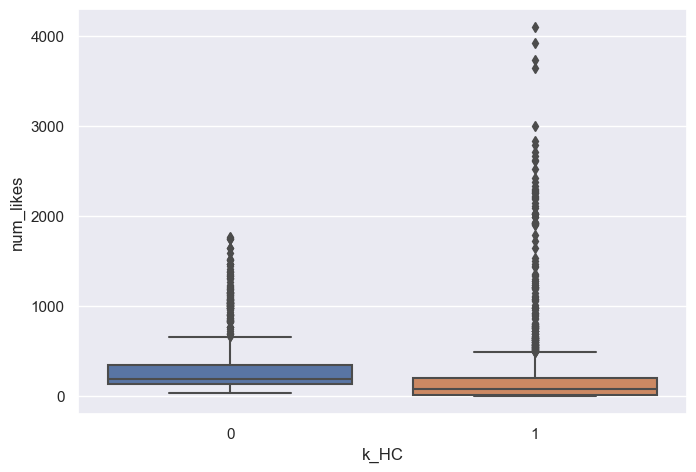

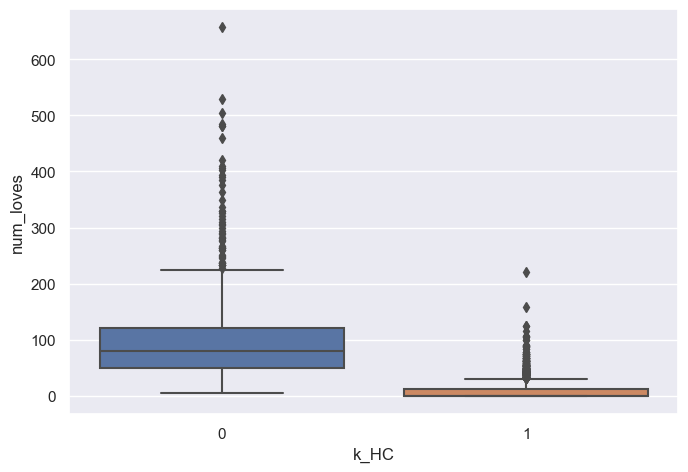

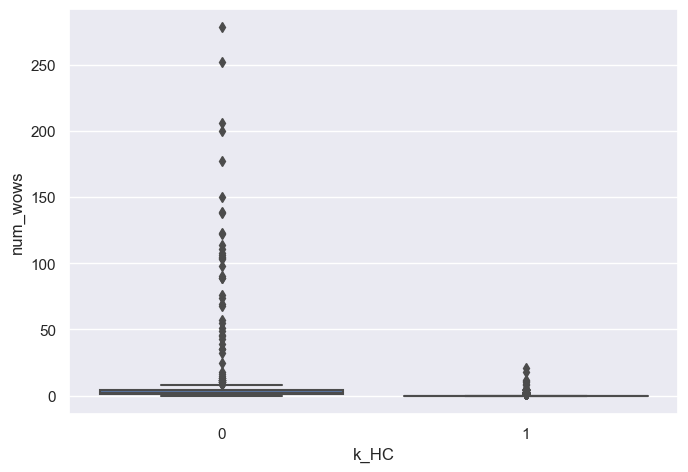

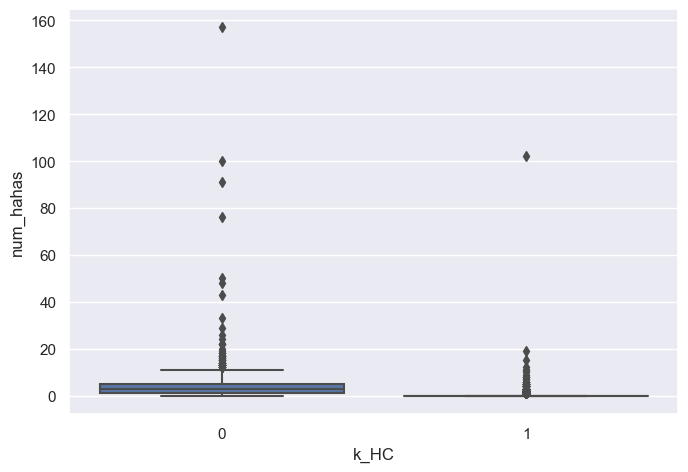

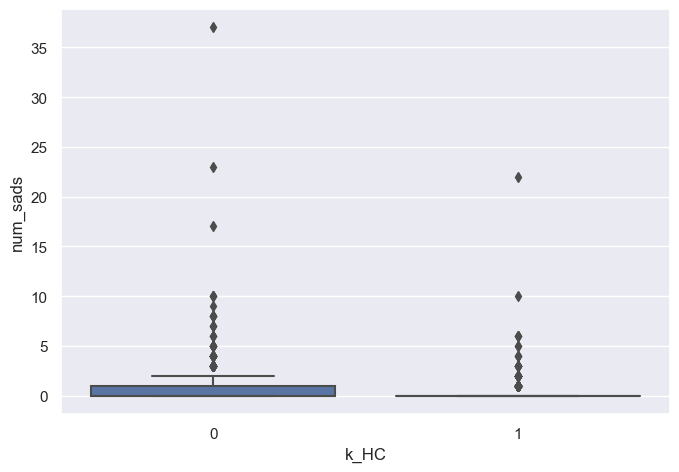

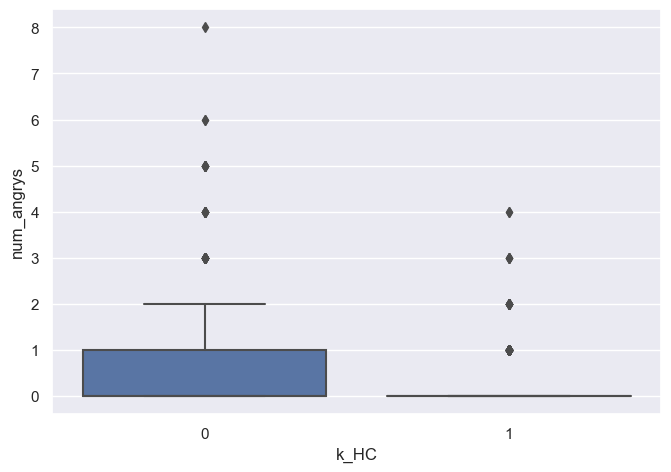

In [96]:
for i in df._get_numeric_data().drop(['kmeans_k'], axis=1).drop(['k_HC'], axis=1).columns:
    plt.figure()
    sns.set(rc={"figure.figsize":(7, 5)})
    plt.tight_layout()
    sns.boxplot(x='k_HC', y=i, data=df[df['status_type']=='video'])

Hem pogut observar que en termes de mitjana el cluster 0 té un nombre de comentaris shares i loves molt superiors. En el cas del cluster 1 són més baixos. Val a dir que també és el cas (tot i que no amb tanta diferencia) per a reactions i likes. 

Ho podem veure també en series temporals.

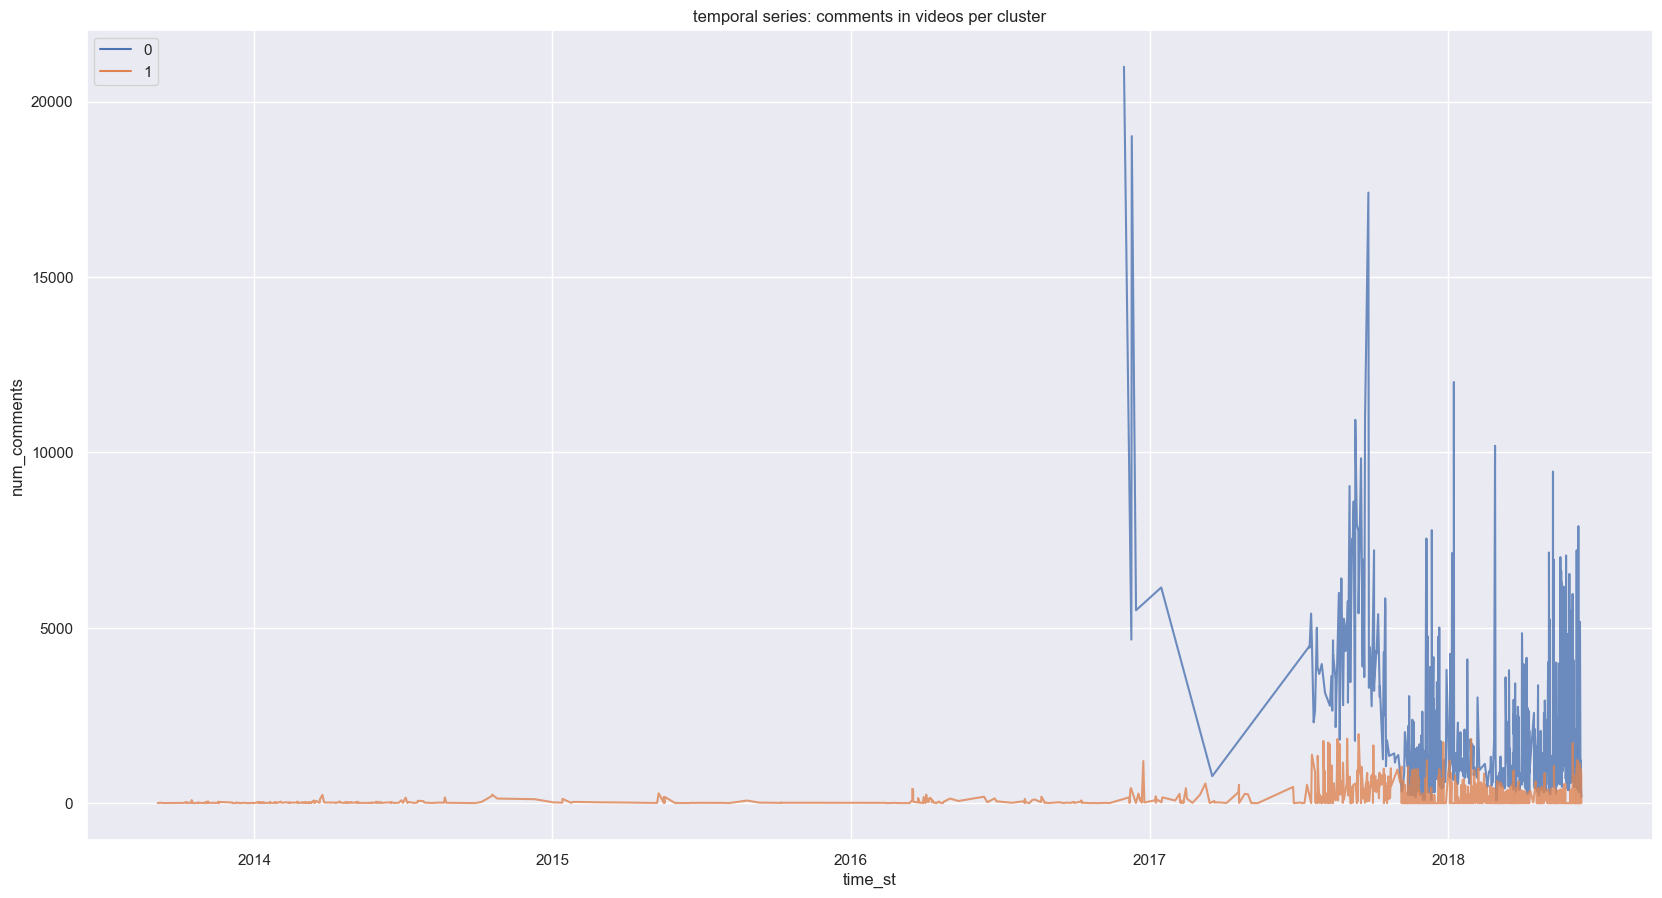

In [97]:
plt.figure(figsize=(18,10))

sns.lineplot(x=df.time_st, y=df[df['status_type']=='video'].num_comments, alpha=0.8, hue=df['k_HC'])

plt.legend(loc="upper left")
plt.title("temporal series: comments in videos per cluster")
plt.show()

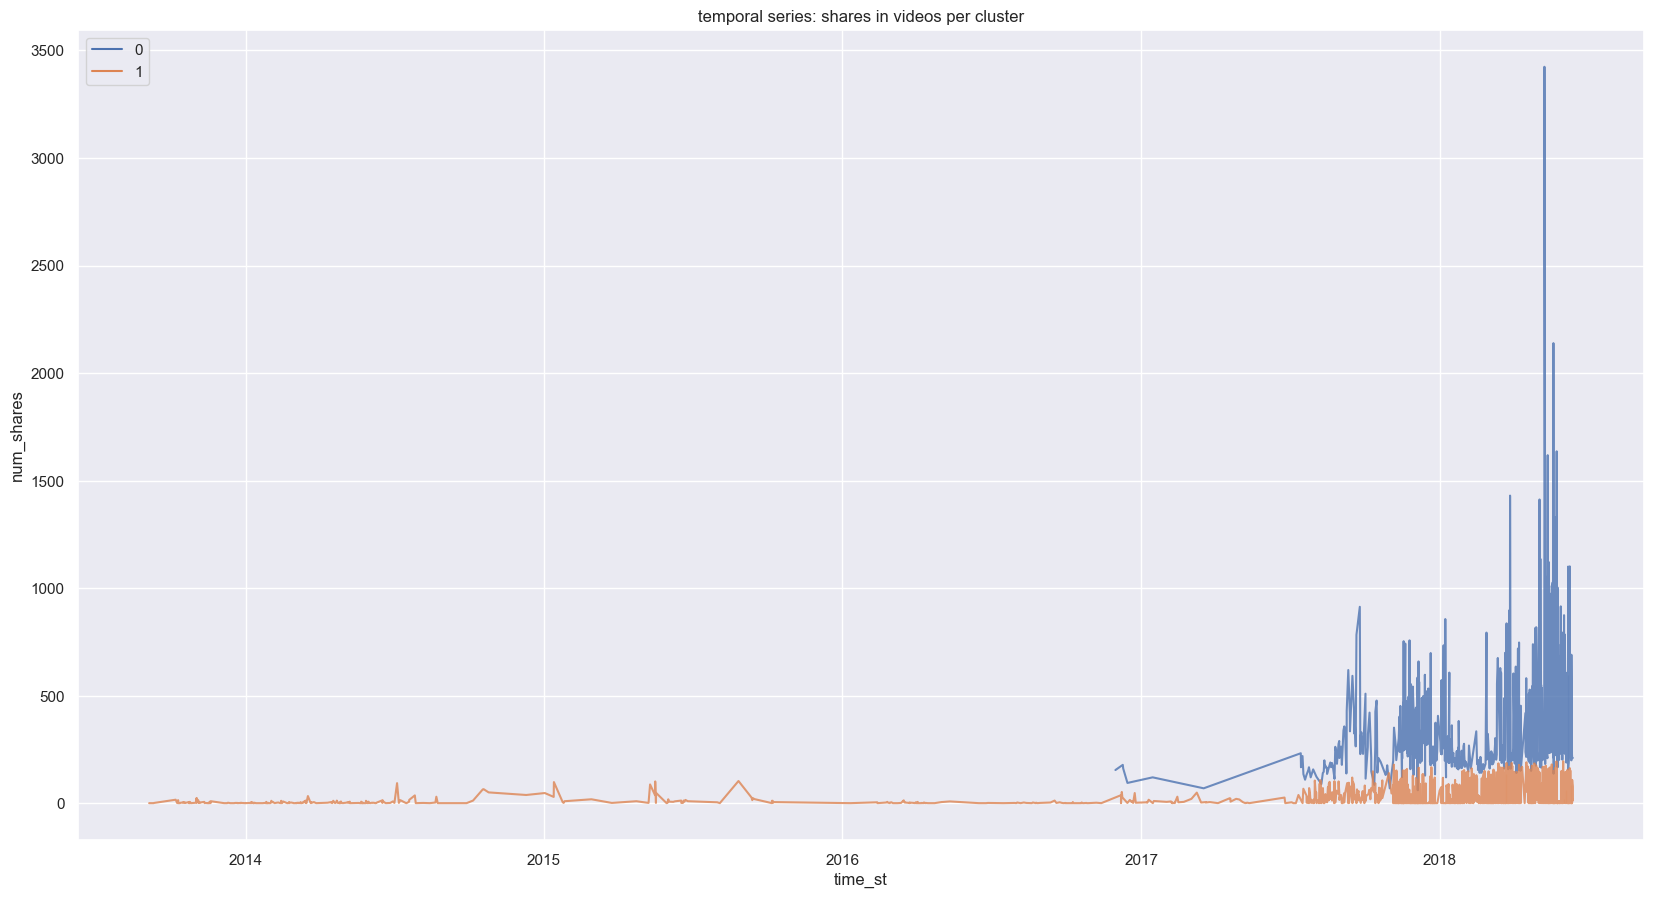

In [98]:
plt.figure(figsize=(18,10))

sns.lineplot(x=df.time_st, y=df[df['status_type']=='video'].num_shares, alpha=0.8, hue=df['k_HC'])

plt.legend(loc="upper left")
plt.title("temporal series: shares in videos per cluster")
plt.show()

### Conclusions

Per K-Means clustering:

- La gran majoria de registres (92 %) pertanyen al cluster 0. Un 7 % pertanyen al cluster 1 i un 1 % de punts molt dispersos pertanyen al cluster 2.

- El dia de la setmana i el periode del dia no han influit. Podem confirmar que la practica totalitat dels links, de les fotos i dels status pertanyen al cluster 0. Una part dels videos també.

- També podem observar que els clusters 1 i 2 han sigut adjudicats a 'video', i no els trobem a cap altra status.

- S'observa a les variables numeriques que en termes de mitjana el cluster 2 té un nombre de comentaris i shares molt superiors. En el cas del cluster 0 són molt baixos, i pel cluster 1, hi ha un terme mitjà. Val a dir que també és el cas (tot i que no amb tanta diferencia) per a reactions i likes. 

Per clustering jerarquic:

- La gran majoria de registres (90,9 %) pertanyen al cluster 1 i un 9,1 % pertanyen al cluster 0.

- El dia de la setmana i el periode del dia no han influit.

- Hem pogut veure que aquest tipus de clustering ha separat el cluster 0 per uns videos que probablement tindran algun tipus de caracteristica. La resta de videos, i la practica totalitat dels links, fotos i status estan englobats al cluster 1.

- S'observa a les variables numeriques que en termes de mitjana el cluster 0 té un nombre de comentaris, shares i loves molt superiors. En el cas del cluster 1 són més baixos. Val a dir que també és el cas (tot i que no amb tanta diferencia) per a reactions i likes. 



## Exercici 3

Els coeficients de Silhouette ja han sigut calculats en els exercicis 1 i 2 per a cada cas.

Els valors han sigut de 0.88 per l'agoritme K-Means i 0.87 pel jerarquic. Bastant propers a 1 però sense ser perfectes.

S'adjunta com a exercici complementari els gràfics de silhouette per diversos valors de k i per cada algoritme.

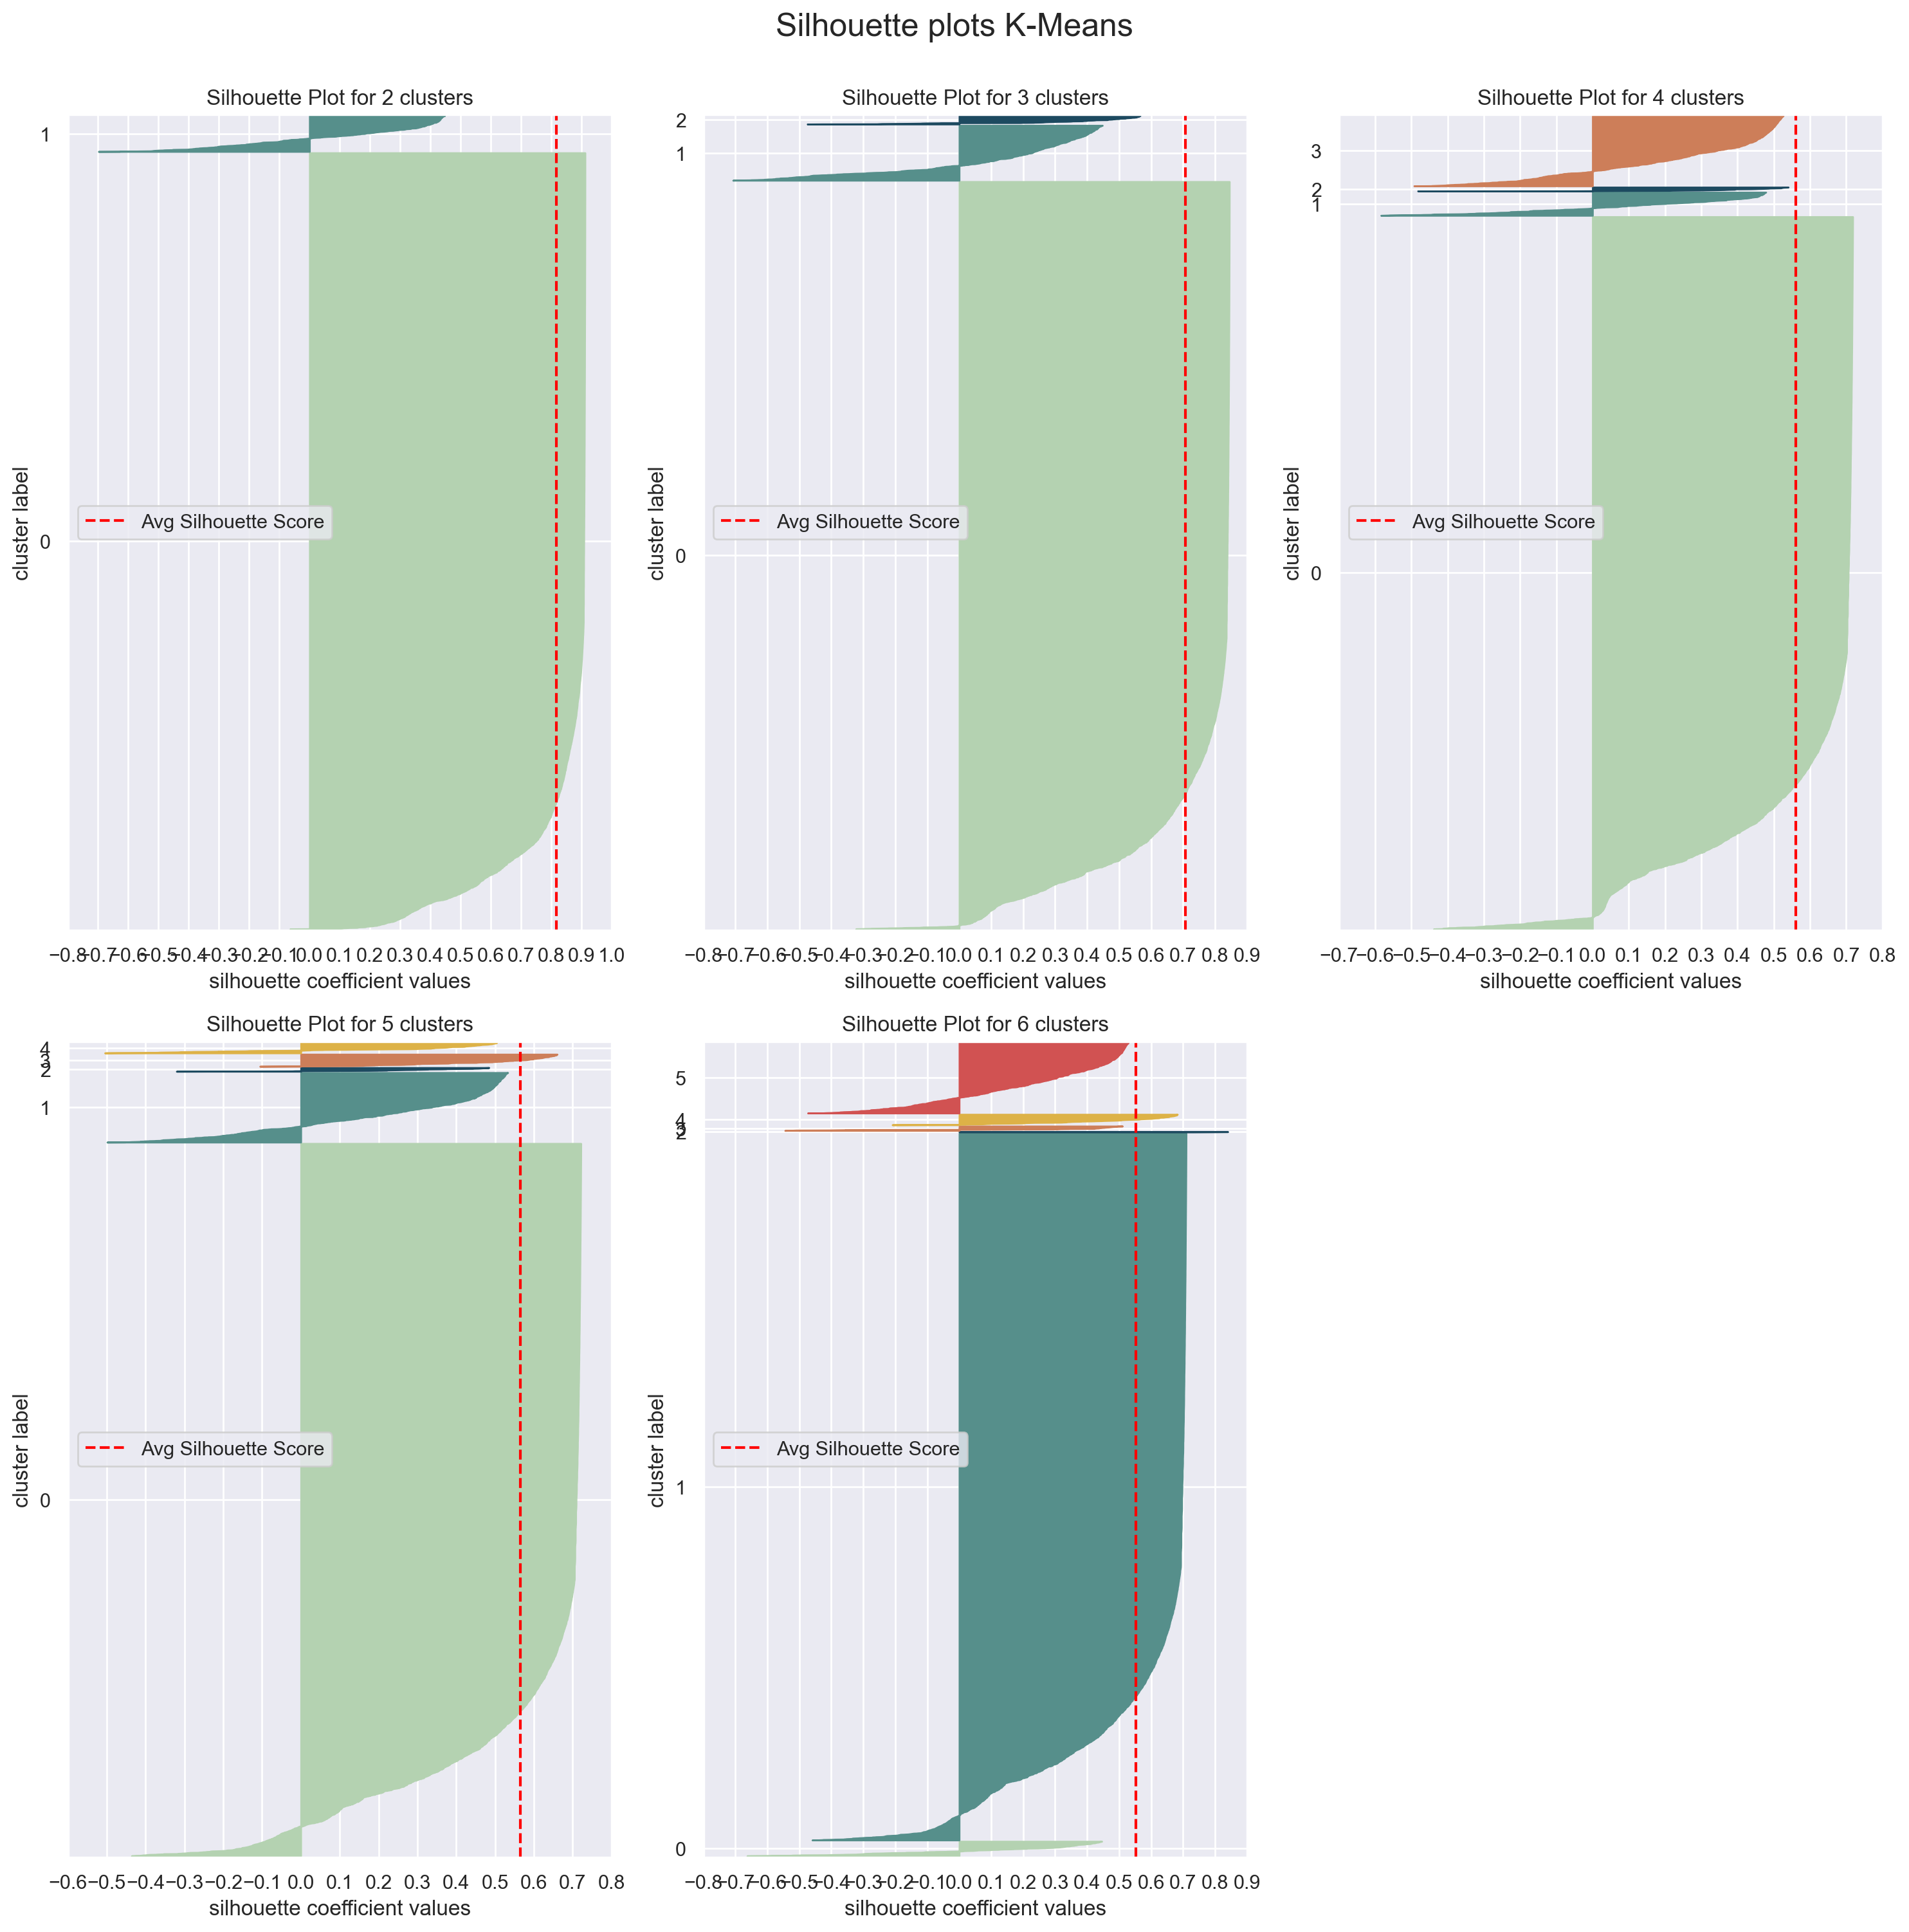

In [99]:

from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.ticker as ticker

cluster_colors = ['#b4d2b1', '#568f8b', '#1d4a60', '#cd7e59', '#ddb247', '#d15252']
def silhouette_plot(X, model, ax, colors):
    y_lower = 10
    y_tick_pos_ = []
    sh_samples = silhouette_samples(df._get_numeric_data().drop(['kmeans_k'], axis=1).drop(['k_HC'], axis=1), model.labels_)
    sh_score = silhouette_score(df._get_numeric_data().drop(['kmeans_k'], axis=1).drop(['k_HC'], axis=1), model.labels_)
    
    for idx in range(model.n_clusters):
        values = sh_samples[model.labels_ == idx]
        values.sort()
        size = values.shape[0]
        y_upper = y_lower + size
        ax.fill_betweenx(np.arange(y_lower, y_upper),0,values,
                         facecolor=colors[idx],edgecolor=colors[idx]
        )
        y_tick_pos_.append(y_lower + 0.5 * size)
        y_lower = y_upper + 10

    ax.axvline(x=sh_score, color="red", linestyle="--", label="Avg Silhouette Score")
    ax.set_title("Silhouette Plot for {} clusters".format(model.n_clusters))
    l_xlim = max(-1, min(-0.1, round(min(sh_samples) - 0.1, 1)))
    u_xlim = min(1, round(max(sh_samples) + 0.1, 1))
    ax.set_xlim([l_xlim, u_xlim])
    ax.set_ylim([0, X.shape[0] + (model.n_clusters + 1) * 10])
    ax.set_xlabel("silhouette coefficient values")
    ax.set_ylabel("cluster label")
    ax.set_yticks(y_tick_pos_)
    ax.set_yticklabels(str(idx) for idx in range(model.n_clusters))
    ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
    ax.legend(loc="center left")
    return ax


# Plot for multiple ks
k_max = 6
ncols = 3
# calculate number of rows
nrows = k_max // ncols + (k_max % ncols > 0)
# set figure size
fig = plt.figure(figsize=(15,15), dpi=200)

for k in range(2,k_max+1):
    
    # Apply clustering for k clusters
    km = KMeans(n_clusters=k, 
                #max_iter=300, 
                #tol=1e-04, 
                #init='k-means++', 
                #n_init=10, 
                random_state=42)
                #algorithm='auto')

    km_fit = km.fit(df_pca)
    
    # create chart
    ax = plt.subplot(nrows, ncols, k-1)
    silhouette_plot(df_pca, km_fit,ax, cluster_colors)

fig.suptitle("Silhouette plots K-Means", fontsize=18, y=1)
plt.tight_layout()
plt.show()


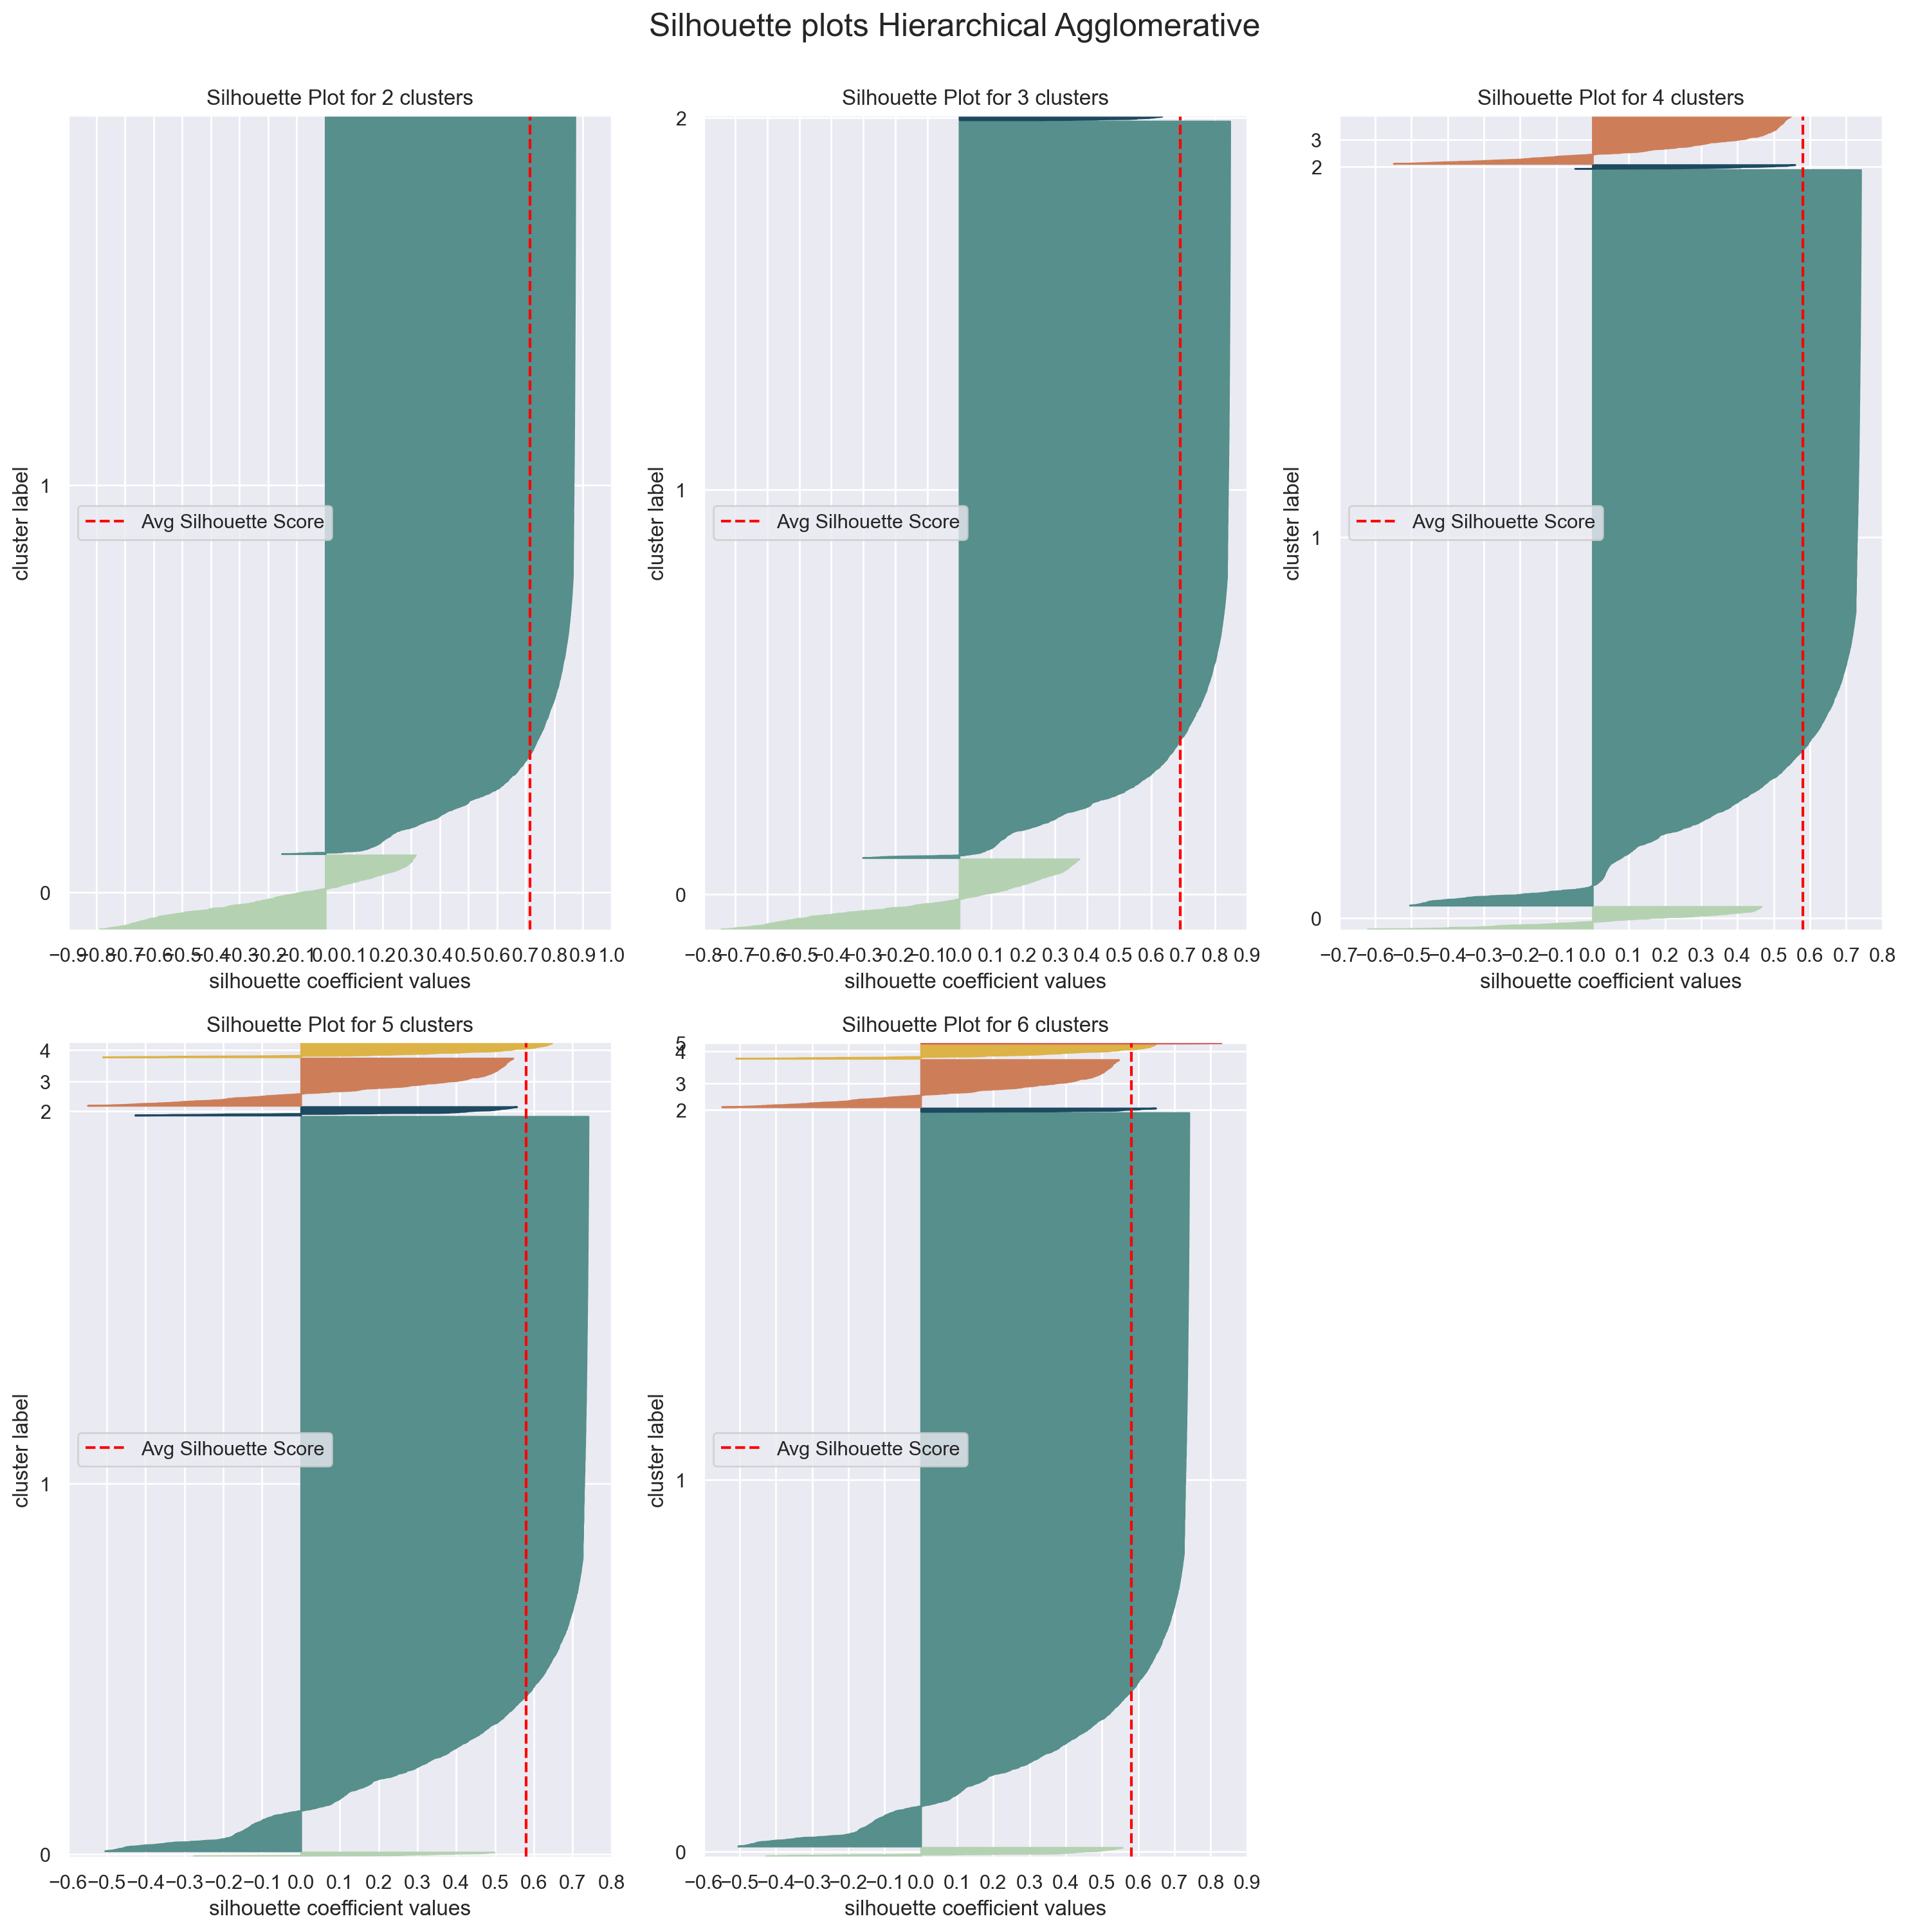

In [100]:
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.ticker as ticker

cluster_colors = ['#b4d2b1', '#568f8b', '#1d4a60', '#cd7e59', '#ddb247', '#d15252']
def silhouette_plot(X, model, ax, colors):
    y_lower = 10
    y_tick_pos_ = []
    sh_samples = silhouette_samples(df._get_numeric_data().drop(['kmeans_k'], axis=1).drop(['k_HC'], axis=1), cluster.labels_)
    sh_score = silhouette_score(df._get_numeric_data().drop(['kmeans_k'], axis=1).drop(['k_HC'], axis=1), cluster.labels_)
    
    for idx in range(cluster.n_clusters):
        values = sh_samples[cluster.labels_ == idx]
        values.sort()
        size = values.shape[0]
        y_upper = y_lower + size
        ax.fill_betweenx(np.arange(y_lower, y_upper),0,values,
                         facecolor=colors[idx],edgecolor=colors[idx]
        )
        y_tick_pos_.append(y_lower + 0.5 * size)
        y_lower = y_upper + 10

    ax.axvline(x=sh_score, color="red", linestyle="--", label="Avg Silhouette Score")
    ax.set_title("Silhouette Plot for {} clusters".format(cluster.n_clusters))
    l_xlim = max(-1, min(-0.1, round(min(sh_samples) - 0.1, 1)))
    u_xlim = min(1, round(max(sh_samples) + 0.1, 1))
    ax.set_xlim([l_xlim, u_xlim])
    ax.set_ylim([0, X.shape[0] + (cluster.n_clusters + 1) * 10])
    ax.set_xlabel("silhouette coefficient values")
    ax.set_ylabel("cluster label")
    ax.set_yticks(y_tick_pos_)
    ax.set_yticklabels(str(idx) for idx in range(cluster.n_clusters))
    ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
    ax.legend(loc="center left")
    return ax


# Plot for multiple ks
k_max = 6
ncols = 3
# calculate number of rows
nrows = k_max // ncols + (k_max % ncols > 0)
# set figure size
fig = plt.figure(figsize=(15,15), dpi=200)

for k in range(2,k_max+1):
    
    cluster = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'ward')
    clust_fit = cluster.fit_predict(df_pca)
    
    #silhouette_score(df_pca, cluster.labels_)
    

    
    # create chart
    ax = plt.subplot(nrows, ncols, k-1)
    silhouette_plot(df_pca, clust_fit,ax, cluster_colors)

fig.suptitle("Silhouette plots Hierarchical Agglomerative", fontsize=18, y=1)
plt.tight_layout()
plt.show()


In [101]:
#sns.pairplot(df.drop(['kmeans_k'], axis=1).drop(['k_HC'], axis=1), hue='status_type', corner=True)
#plt.show()

In [102]:
#sns.pairplot(df.drop(['k_HC'], axis=1), hue='kmeans_k', corner=True)
#plt.show()

In [103]:
#sns.pairplot(df.drop(['kmeans_k'], axis=1), hue='k_HC', corner=True)
#plt.show()

### Sources

https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

https://blog.resolvingpython.com/05-the-k-means-unsupervised-clustering-models

https://realpython.com/k-means-clustering-python/

https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/

https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/

https://github.com/Develop-Packt/Hierarchical-Clustering/blob/master/Activity01/Activity01.ipynb

https://h1ros.github.io/posts/k-means-clustering/

https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/

https://towardsdatascience.com/k-means-clustering-and-principal-component-analysis-in-10-minutes-2c5b69c36b6b

https://365datascience.com/tutorials/python-tutorials/pca-k-means/

https://365datascience.com/tutorials/python-tutorials/principal-components-analysis/




https://towardsdatascience.com/the-easiest-way-to-interpret-clustering-result-8137e488a127

https://towardsdatascience.com/best-practices-for-visualizing-your-cluster-results-20a3baac7426
